# Build a model to predict startup success rate.

# Objective: -

A startup or start-up is a company or project begun by an entrepreneur to seek, develop, and validate a scalable economic model. While entrepreneurship refers to all new businesses, including self-employment and businesses that never intend to become registered, startups refer to new businesses that intend to grow large beyond the solo founder. Startups face high uncertainty and have high rates of failure, but a minority of them do go on to be successful and influential. Some startups become unicorns: privately held startup companies valued at over US$1 billion.

The objective is to predict whether a startup which is currently operating turns into a success or a failure. The success of a company is defined as the event that gives the company's founders a large sum of money through the process of M&A (Merger and Acquisition) or an IPO (Initial Public Offering). A company would be considered as failed if it had to be shut down.

The goal of this challenge is to build a machine learning model that helps predict the startups success rate.

# Step 1: Import all the required libraries

- __Pandas__ : In computer programming, pandas is a software library written for the Python programming language for data manipulation and analysis and storing in a proper way. In particular, it offers data structures and operations for manipulating numerical tables and time series
- __Sklearn__ : Scikit-learn (formerly scikits.learn) is a free software machine learning library for the Python programming language. It features various classification, regression and clustering algorithms including support vector machines, random forests, gradient boosting, k-means and DBSCAN, and is designed to interoperate with the Python numerical and scientific libraries NumPy and SciPy. The library is built upon the SciPy (Scientific Python) that must be installed before you can use scikit-learn.
- __Pickle__ : Python pickle module is used for serializing and de-serializing a Python object structure. Pickling is a way to convert a python object (list, dict, etc.) into a character stream. The idea is that this character stream contains all the information necessary to reconstruct the object in another python script.
- __Seaborn__ : Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.
- __Matplotlib__ : Matplotlib is a plotting library for the Python programming language and its numerical mathematics extension NumPy. It provides an object-oriented API for embedding plots into applications using general-purpose GUI toolkits like Tkinter, wxPython, Qt, or GTK.

In [1]:
#Loading libraries 
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import sklearn.linear_model 
import sklearn
import pickle
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import scale 
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA
import warnings

warnings.filterwarnings('ignore')

# Step 2 : Read dataset and basic details of dataset
Goal:- In this step we are going to read the dataset, view the dataset and analysis the basic details like total number of rows and columns, what are the column data types and see to need to create new column or not.


In this stage we are going to read our problem dataset and have a look on it.

In [2]:
#loading the dataset
try:
    df = pd.read_csv('F:\ML models\Startup succcess rate prediction\Data\data.csv') #Path for the file
    print('Data read done successfully...')
except (FileNotFoundError, IOError):
    print("Wrong file or file path")   

Data read done successfully...


In [3]:
# To view the content inside the dataset we can use the head() method that returns a specified number of rows, string from the top. 
# The head() method returns the first 5 rows if a number is not specified.
df.head()

Unnamed: 0 state_code   latitude   longitude zip_code       id  \
0        1005         CA  42.358880  -71.056820    92101   c:6669   
1         204         CA  37.238916 -121.973718    95032  c:16283   
2        1001         CA  32.901049 -117.192656    92121  c:65620   
3         738         CA  37.320309 -122.050040    95014  c:42668   
4        1002         CA  37.779281 -122.419236    94105  c:65806   

            city              Unnamed: 6               name  labels  ...  \
0      San Diego                     NaN        Bandsintown       1  ...   
1      Los Gatos                     NaN          TriCipher       1  ...   
2      San Diego      San Diego CA 92121              Plixi       1  ...   
3      Cupertino      Cupertino CA 95014  Solidcore Systems       1  ...   
4  San Francisco  San Francisco CA 94105     Inhale Digital       0  ...   

  object_id has_VC has_angel has_roundA  has_roundB  has_roundC  has_roundD  \
0    c:6669      0         1          0           0           0           0   
1   c:16283      1         0          0           1           1           1   
2   c:65620      0         0          1           0           0           0   
3   c:42668      0         0          0           1           1           1   
4   c:65806      1         1          0           0           0           0   

   avg_participants  is_top500    status  
0            1.0000          0  acquired  
1            4.7500          1  acquired  
2            4.0000          1  acquired  
3            3.3333          1  acquired  
4            1.0000          1    closed  

[5 rows x 49 columns]

# Dataset: -

The dataset used in this model is available at Kaggle.

Attribute Information:
1. status(acquired/closed) – categorical (the target variable, if a startup is ‘acquired’ by some other organization, means the startup succeed) 

**Other features:**

1.  Unnamed: 0
2.  state_code
3.  latitude
4.  longitude
5.  zip_code
6.  id
7.  city
8.  Unnamed: 6
9.  name
10. labels
11. founded_at
12. closed_at
13. first_funding_at
14. last_funding_at
15. age_first_funding_year
16. age_last_funding_year
17. age_first_milestone_year
18. age_last_milestone_year
19. relationships
20. funding_rounds
21. funding_total_usd
22. milestones
23. state_code.1
24. is_CA
25. is_NY
26. is_MA
27. is_TX
28. is_otherstate
29. category_code
30. is_software
31. is_web
32. is_mobile
33. is_enterprise
34. is_advertising
35. is_gamesvideo
36. is_ecommerce
37. is_biotech
38. is_consulting
39. is_othercategory
40. object_id
41. has_VC
42. has_angel
43. has_roundA
44. has_roundB
45. has_roundC
46. has_roundD
47. avg_participants
48. is_top500

# Step3: Data Preprocessing

**Why need of Data Preprocessing?**

Preprocessing data is an important step for data analysis. The following are some benefits of preprocessing data:

 - It improves accuracy and reliability. Preprocessing data removes missing or inconsistent data values resulting from human or computer error, which can improve the accuracy and quality of a dataset, making it more reliable.
 - It makes data consistent. When collecting data, it's possible to have data duplicates, and discarding them during preprocessing can ensure the data values for analysis are consistent, which helps produce accurate results.
 - It increases the data's algorithm readability. Preprocessing enhances the data's quality and makes it easier for machine learning algorithms to read, use, and interpret it.

**Why we drop column?**

By analysing the first five rows we found that there is a column named ['Unnamed: 0','Unnamed: 6'], it has  only NAN(Not A Number) values which isn't good for our model, se we gonna drop it using the below method:

In [4]:
df = df.drop(['Unnamed: 0','Unnamed: 6'], axis =1)

Axis are defined for arrays with more than one dimension. A 2-dimensional array has two corresponding axes: the first running vertically downwards across rows (axis 0) 
and the second running horizontally across columns (axis 1).

#### (axis=1) defines that the column named ('Unnamed: 0','Unnamed: 6') should be dropped from the dataset.

After we read the data, we can look at the data using:

In [5]:
# count the total number of rows and columns.
print ('The train data has {0} rows and {1} columns'.format(df.shape[0],df.shape[1]))

The train data has 923 rows and 47 columns


#### By analysing the problem statement and the dataset, we get to know that the target variable is "status" column which is continuous and shows whether startup acquired or closed.

In [7]:
df['status'].value_counts()

acquired    597
closed      326
Name: status, dtype: int64

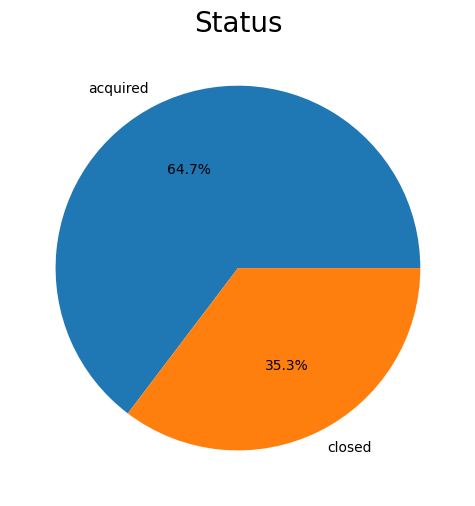

In [8]:
features = ['status']

plt.subplots(figsize=(20, 10))
for i, col in enumerate(features):
    plt.subplot(1, 3, i + 1)

    x = df[col].value_counts()
    plt.pie(x.values,
            labels=x.index,
            autopct='%1.1f%%')
    plt.title('Status',fontsize=20)

plt.show()


#### The df.value_counts() method counts the number of types of values a particular column contains. 

In [7]:
df.shape

(923, 47)

#### The df.shape method shows the shape of the dataset. 

We can identify that out of the 923 startups, 597 are labeled as acquired and 326 as closed.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 923 entries, 0 to 922
Data columns (total 47 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   state_code                923 non-null    object 
 1   latitude                  923 non-null    float64
 2   longitude                 923 non-null    float64
 3   zip_code                  923 non-null    object 
 4   id                        923 non-null    object 
 5   city                      923 non-null    object 
 6   name                      923 non-null    object 
 7   labels                    923 non-null    int64  
 8   founded_at                923 non-null    object 
 9   closed_at                 335 non-null    object 
 10  first_funding_at          923 non-null    object 
 11  last_funding_at           923 non-null    object 
 12  age_first_funding_year    923 non-null    float64
 13  age_last_funding_year     923 non-null    float64
 14  age_first_

#### The df.info() method prints information about a DataFrame including the index dtype and columns, non-null values and memory usage. 

In [9]:
df.iloc[1]

state_code                          CA
latitude                     37.238916
longitude                  -121.973718
zip_code                         95032
id                             c:16283
city                         Los Gatos
name                         TriCipher
labels                               1
founded_at                    1/1/2000
closed_at                          NaN
first_funding_at             2/14/2005
last_funding_at             12/28/2009
age_first_funding_year           5.126
age_last_funding_year           9.9973
age_first_milestone_year        7.0055
age_last_milestone_year         7.0055
relationships                        9
funding_rounds                       4
funding_total_usd             40100000
milestones                           1
state_code.1                        CA
is_CA                                1
is_NY                                0
is_MA                                0
is_TX                                0
is_otherstate            

####  df.iloc[ ] is primarily integer position based (from 0 to length-1 of the axis), but may also be used with a boolean array. The iloc property gets, or sets, the value(s) of the specified indexes.

### Data Type Check for every column

**Why data type check is required?**

Data type check helps us with understanding what type of variables our dataset contains. It helps us with identifying whether to keep that variable or not. If the dataset contains contiguous data, then only float and integer type variables will be beneficial and if we have to classify any value then categorical variables will be beneficial.

In [10]:
objects_cols = ['object']
objects_lst = list(df.select_dtypes(include=objects_cols).columns)

In [11]:
print("Total number of categorical columns are ", len(objects_lst))
print("There names are as follows: ", objects_lst)

Total number of categorical columns are  13
There names are as follows:  ['state_code', 'zip_code', 'id', 'city', 'name', 'founded_at', 'closed_at', 'first_funding_at', 'last_funding_at', 'state_code.1', 'category_code', 'object_id', 'status']


In [12]:
int64_cols = ['int64']
int64_lst = list(df.select_dtypes(include=int64_cols).columns)

In [13]:
print("Total number of numerical columns are ", len(int64_lst))
print("There names are as follows: ", int64_lst)

Total number of numerical columns are  27
There names are as follows:  ['labels', 'relationships', 'funding_rounds', 'funding_total_usd', 'milestones', 'is_CA', 'is_NY', 'is_MA', 'is_TX', 'is_otherstate', 'is_software', 'is_web', 'is_mobile', 'is_enterprise', 'is_advertising', 'is_gamesvideo', 'is_ecommerce', 'is_biotech', 'is_consulting', 'is_othercategory', 'has_VC', 'has_angel', 'has_roundA', 'has_roundB', 'has_roundC', 'has_roundD', 'is_top500']


In [14]:
float64_cols = ['float64']
float64_lst = list(df.select_dtypes(include=float64_cols).columns)

In [15]:
print("Total number of numerical columns are ", len(float64_lst))
print("There names are as follows: ", float64_lst)

Total number of numerical columns are  7
There names are as follows:  ['latitude', 'longitude', 'age_first_funding_year', 'age_last_funding_year', 'age_first_milestone_year', 'age_last_milestone_year', 'avg_participants']


#### In the dataset , the column named as "id" and "object_id", we will count the unique values of id column which is shown below and also the length of dataset.

In [16]:
len(df['id'].unique()), df.shape[0]

(922, 923)

In [17]:
len(df['object_id'].unique()), df.shape[0]

(922, 923)

 - The uniqueness of "id" and "object_id" columns and length of the dataset both are same that means there is no sense to keep id and "object_id" columns so we have to drop that columns:

In [18]:
df = df.drop(['id','object_id'],axis=1)

#### In the dataset , the column named as "is_consulting", we will count the unique values of is_consulting column which is shown below and also the length of dataset.

In [19]:
len(df['is_consulting'].unique()), df.shape[0]

(2, 923)

 - The uniqueness of "is_consulting" column 2 so we have to drop that column:

In [20]:
df = df.drop(['is_consulting'],axis=1)

In [21]:
#count the total number of rows and columns.
print ('The new dataset has {0} rows and {1} columns'.format(df.shape[0],df.shape[1]))

The new dataset has 923 rows and 44 columns


## Step 2 Insights: -

1) We have total 44 features where 26 of them are integer type, 11 are object type while other are float type.

2) Drop "id",  "object_id", "is_consulting", "unnamed:0" and "unnamed:6" columns.

After this step we have to calculate various evaluation parameters which will help us in cleaning and analysing the data more accurately.

# Step 3: Descriptive Analysis

**Goal/Purpose:**  Finding the data distribution of the features. Visualization helps to understand data and also to explain the data to another person.

Things we are going to do in this step:

1. Mean
2. Median
3. Mode
4. Standard Deviation
5. Variance
6. Null Values
7. NaN Values
8. Min value
9. Max value
10. Count Value
11. Quatilers
12. Correlation
13. Skewness

In [22]:
df.describe()

latitude   longitude      labels  age_first_funding_year  \
count  923.000000  923.000000  923.000000              923.000000   
mean    38.517442 -103.539212    0.646804                2.235630   
std      3.741497   22.394167    0.478222                2.510449   
min     25.752358 -122.756956    0.000000               -9.046600   
25%     37.388869 -122.198732    0.000000                0.576700   
50%     37.779281 -118.374037    1.000000                1.446600   
75%     40.730646  -77.214731    1.000000                3.575350   
max     59.335232   18.057121    1.000000               21.895900   

       age_last_funding_year  age_first_milestone_year  \
count             923.000000                771.000000   
mean                3.931456                  3.055353   
std                 2.967910                  2.977057   
min                -9.046600                -14.169900   
25%                 1.669850                  1.000000   
50%                 3.528800                  2.520500   
75%                 5.560250                  4.686300   
max                21.895900                 24.684900   

       age_last_milestone_year  relationships  funding_rounds  \
count               771.000000     923.000000      923.000000   
mean                  4.754423       7.710726        2.310943   
std                   3.212107       7.265776        1.390922   
min                  -7.005500       0.000000        1.000000   
25%                   2.411000       3.000000        1.000000   
50%                   4.476700       5.000000        2.000000   
75%                   6.753400      10.000000        3.000000   
max                  24.684900      63.000000       10.000000   

       funding_total_usd  ...  is_biotech  is_othercategory      has_VC  \
count       9.230000e+02  ...  923.000000        923.000000  923.000000   
mean        2.541975e+07  ...    0.036836          0.322860    0.326111   
std         1.896344e+08  ...    0.188462          0.467823    0.469042   
min         1.100000e+04  ...    0.000000          0.000000    0.000000   
25%         2.725000e+06  ...    0.000000          0.000000    0.000000   
50%         1.000000e+07  ...    0.000000          0.000000    0.000000   
75%         2.472500e+07  ...    0.000000          1.000000    1.000000   
max         5.700000e+09  ...    1.000000          1.000000    1.000000   

        has_angel  has_roundA  has_roundB  has_roundC  has_roundD  \
count  923.000000  923.000000  923.000000  923.000000  923.000000   
mean     0.254605    0.508126    0.392199    0.232936    0.099675   
std      0.435875    0.500205    0.488505    0.422931    0.299729   
min      0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    1.000000    0.000000    0.000000    0.000000   
75%      1.000000    1.000000    1.000000    0.000000    0.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000   

       avg_participants   is_top500  
count        923.000000  923.000000  
mean           2.838586    0.809317  
std            1.874601    0.393052  
min            1.000000    0.000000  
25%            1.500000    1.000000  
50%            2.500000    1.000000  
75%            3.800000    1.000000  
max           16.000000    1.000000  

[8 rows x 33 columns]

#### The df.describe() method returns description of the data in the DataFrame. If the DataFrame contains numerical data, the description contains these information for each column: count - The number of not-empty values. mean - The average (mean) value. 

# Measure the variability of data of the dataset

Variability describes how far apart data points lie from each other and from the center of a distribution.

# 1. Standard Deviation

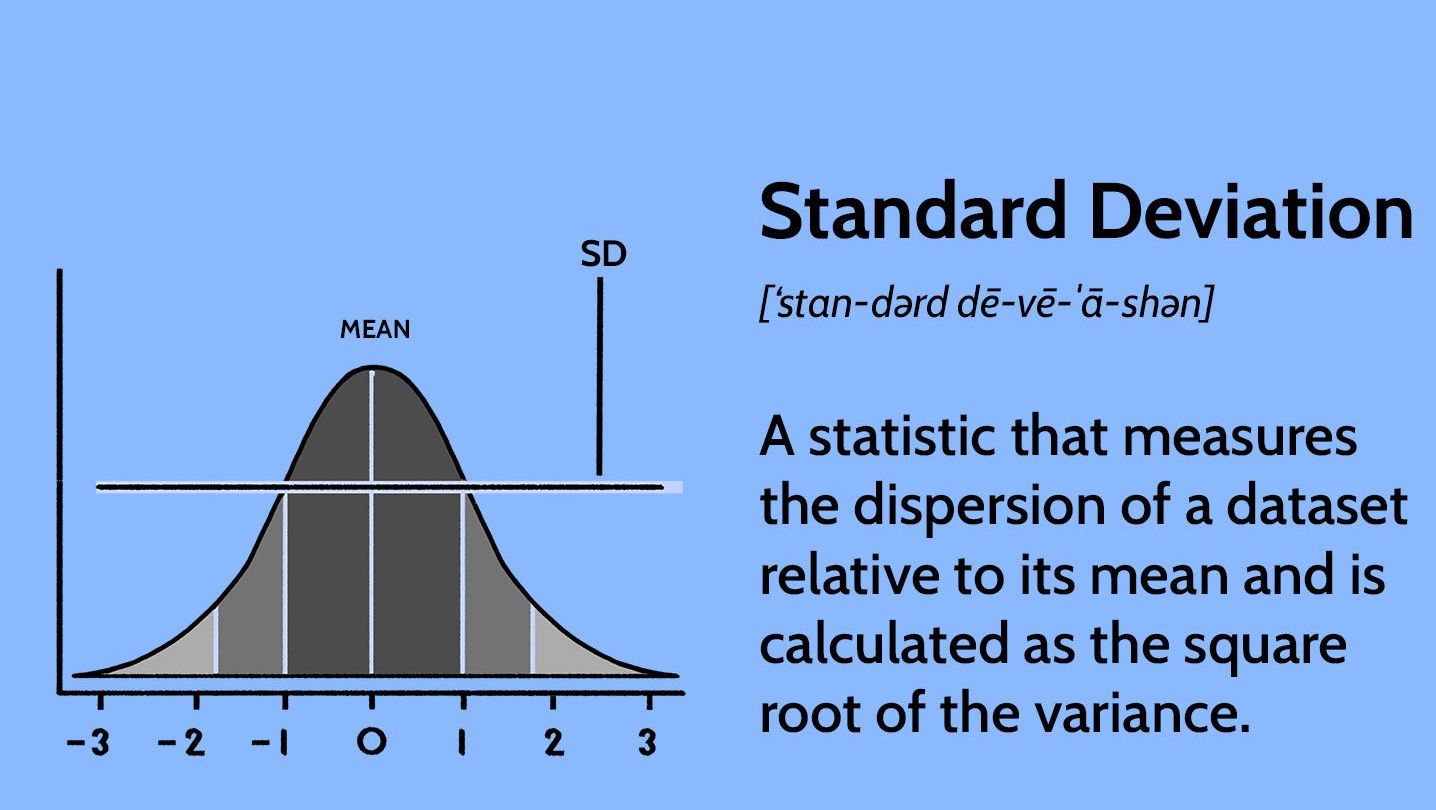

The standard deviation is the average amount of variability in your dataset.

It tells you, on average, how far each data point lies from the mean. The larger the standard deviation, the more variable the data set is and if zero variance then there is no variability in the dataset that means there no use of that dataset.


So, it helps in understanding the measurements when the data is distributed. The more the data is distributed, the greater will be the standard deviation of that data.Here, you as an individual can determine which company is beneficial in long term. But, if you didn't know the SD you would have choosen a wrong compnay for you.

In [23]:
df.std()

latitude                    3.741497e+00
longitude                   2.239417e+01
labels                      4.782221e-01
age_first_funding_year      2.510449e+00
age_last_funding_year       2.967910e+00
age_first_milestone_year    2.977057e+00
age_last_milestone_year     3.212107e+00
relationships               7.265776e+00
funding_rounds              1.390922e+00
funding_total_usd           1.896344e+08
milestones                  1.322632e+00
is_CA                       4.995068e-01
is_NY                       3.190051e-01
is_MA                       2.862282e-01
is_TX                       2.085193e-01
is_otherstate               4.151578e-01
is_software                 3.720701e-01
is_web                      3.630644e-01
is_mobile                   2.799100e-01
is_enterprise               2.700254e-01
is_advertising              2.504558e-01
is_gamesvideo               2.306983e-01
is_ecommerce                1.624209e-01
is_biotech                  1.884621e-01
is_othercategory

#### We can also understand the standard deviation using the below function. 

In [24]:
def std_cal(df,float64_lst):
    
    cols = ['normal_value', 'zero_value']
    zero_value = 0
    normal_value = 0
    
    for value in float64_lst:
    
        rs = round(df[value].std(),6)

        if rs > 0:
            normal_value = normal_value + 1

        elif rs == 0:
            zero_value = zero_value + 1
    
    std_total_df =  pd.DataFrame([[normal_value, zero_value]], columns=cols) 
    
    return std_total_df

In [25]:
int64_cols = ['int64']
int64_lst = list(df.select_dtypes(include=int64_cols).columns)
std_cal(df,int64_lst)

normal_value  zero_value
0            26           0

In [26]:
float64_cols = ['float64']
float64_lst = list(df.select_dtypes(include=float64_cols).columns)
std_cal(df,float64_lst)

normal_value  zero_value
0             7           0

zero_value -> is the zero variance and when then there is no variability in the dataset that means there no use of that dataset.



# 2. Variance

The variance is the average of squared deviations from the mean. A deviation from the mean is how far a score lies from the mean.

Variance is the square of the standard deviation. This means that the units of variance are much larger than those of a typical value of a data set.

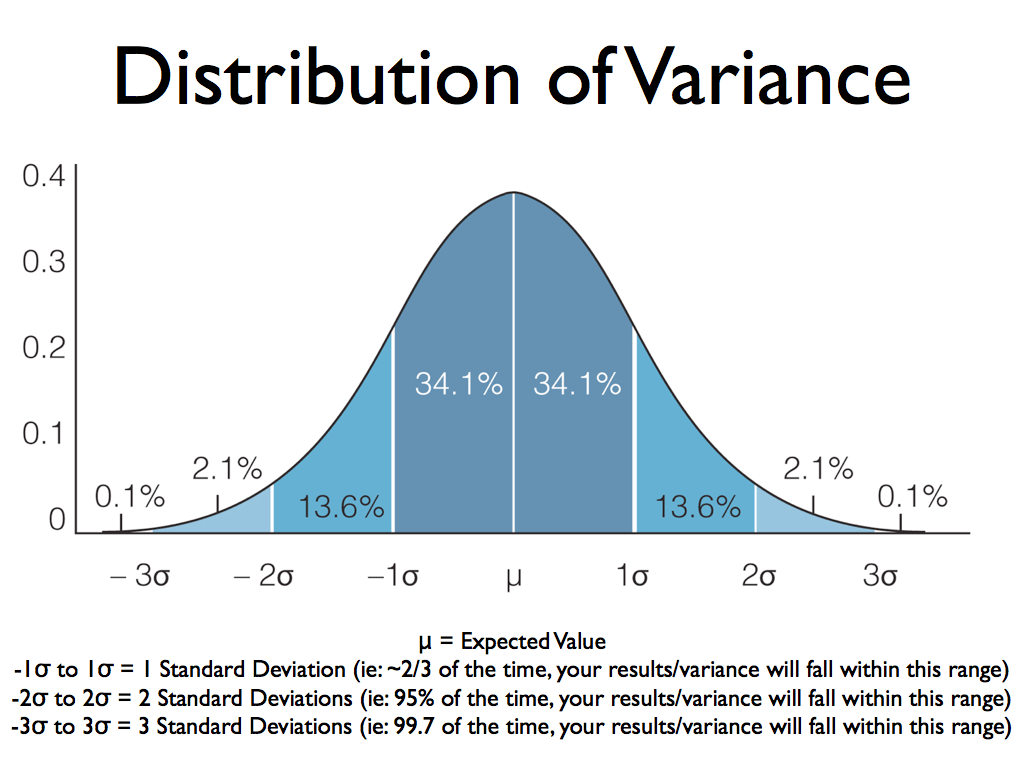

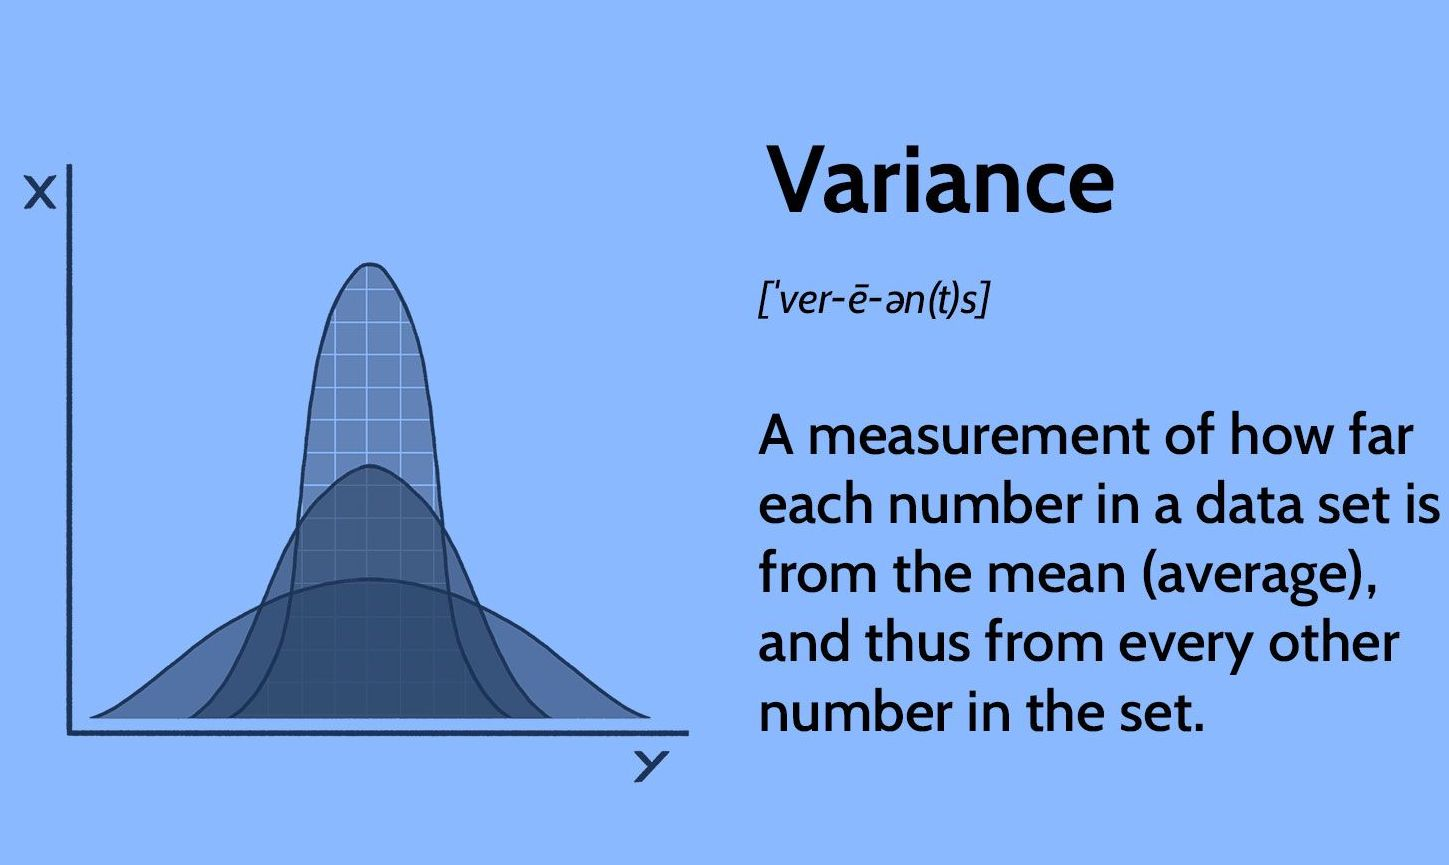

#### Why do we used Variance ?

By Squairng the number we get non-negative computation i.e. Disperson cannot be negative.
The presence of variance is very important in your dataset because this will allow the model to learn about the different patterns hidden in the data

In [27]:
df.var()

latitude                    1.399880e+01
longitude                   5.014987e+02
labels                      2.286964e-01
age_first_funding_year      6.302352e+00
age_last_funding_year       8.808489e+00
age_first_milestone_year    8.862869e+00
age_last_milestone_year     1.031763e+01
relationships               5.279150e+01
funding_rounds              1.934663e+00
funding_total_usd           3.596119e+16
milestones                  1.749355e+00
is_CA                       2.495071e-01
is_NY                       1.017643e-01
is_MA                       8.192657e-02
is_TX                       4.348030e-02
is_otherstate               1.723560e-01
is_software                 1.384362e-01
is_web                      1.318158e-01
is_mobile                   7.834962e-02
is_enterprise               7.291370e-02
is_advertising              6.272811e-02
is_gamesvideo               5.322172e-02
is_ecommerce                2.638054e-02
is_biotech                  3.551796e-02
is_othercategory

#### We can also understand the Variance using the below function.

In [28]:
zero_cols = []

def var_cal(df,float64_lst):
    
    cols = ['normal_value', 'zero_value']
    zero_value = 0
    normal_value = 0
    
    for value in float64_lst:
    
        rs = round(df[value].var(),6)

        if rs > 0:
            normal_value = normal_value + 1

        elif rs == 0:
            zero_value = zero_value + 1
            zero_cols.append(value)
    
    var_total_df =  pd.DataFrame([[normal_value, zero_value]], columns=cols) 
    
    return var_total_df

In [29]:
var_cal(df, int64_lst)

normal_value  zero_value
0            26           0

In [30]:
var_cal(df, float64_lst)

normal_value  zero_value
0             7           0

zero_value -> Zero variance means that there is no difference in the data values, which means that they are all the same.

# Measure central tendency

A measure of central tendency is a single value that attempts to describe a set of data by identifying the central position within that set of data. As such, measures of central tendency are sometimes called measures of central location. They are also classed as summary statistics.



Mean - The average value. Median - The mid point value. Mode - The most common value.

# 1. Mean

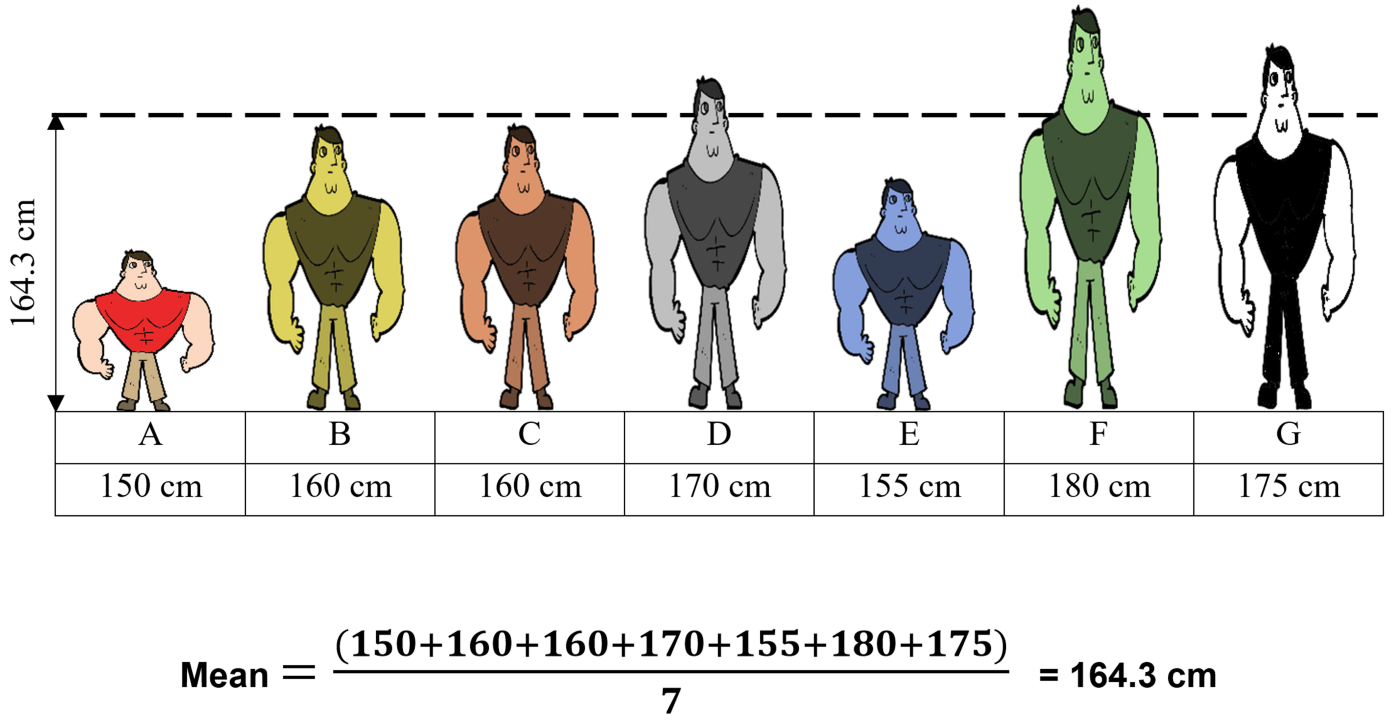

The mean is the arithmetic average, and it is probably the measure of central tendency that you are most familiar.

#### Why do we calculate mean?




The mean is used to summarize a data set. It is a measure of the center of a data set.


In [31]:
df.mean()

latitude                    3.851744e+01
longitude                  -1.035392e+02
labels                      6.468039e-01
age_first_funding_year      2.235630e+00
age_last_funding_year       3.931456e+00
age_first_milestone_year    3.055353e+00
age_last_milestone_year     4.754423e+00
relationships               7.710726e+00
funding_rounds              2.310943e+00
funding_total_usd           2.541975e+07
milestones                  1.841820e+00
is_CA                       5.276273e-01
is_NY                       1.148429e-01
is_MA                       8.992416e-02
is_TX                       4.550379e-02
is_otherstate               2.210184e-01
is_software                 1.657638e-01
is_web                      1.560130e-01
is_mobile                   8.559047e-02
is_enterprise               7.908992e-02
is_advertising              6.717226e-02
is_gamesvideo               5.633803e-02
is_ecommerce                2.708559e-02
is_biotech                  3.683640e-02
is_othercategory

#### We can also understand the mean using the below function. 

In [32]:
def mean_cal(df,int64_lst):
    
    cols = ['normal_value', 'zero_value']
    zero_value = 0
    normal_value = 0
    
    for value in int64_lst:
    
        rs = round(df[value].mean(),6)

        if rs > 0:
            normal_value = normal_value + 1

        elif rs == 0:
            zero_value = zero_value + 1
    
    mean_total_df =  pd.DataFrame([[normal_value, zero_value]], columns=cols) 
    
    return mean_total_df

In [33]:
mean_cal(df, int64_lst)

normal_value  zero_value
0            26           0

In [34]:
mean_cal(df, float64_lst)

normal_value  zero_value
0             6           0

zero_value -> that the mean of a paticular column is zero, which isn't usefull in anyway and need to be drop.

# 2.Median
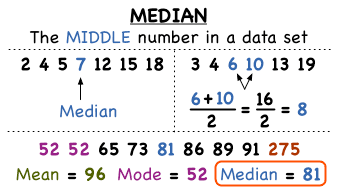

The median is the middle value. It is the value that splits the dataset in half.The median of a dataset is the value that, assuming the dataset is ordered from smallest to largest, falls in the middle. If there are an even number of values in a dataset, the middle two values are the median.

#### Why do we calculate median ?

By comparing the median to the mean, you can get an idea of the distribution of a dataset. When the mean and the median are the same, the dataset is more or less evenly distributed from the lowest to highest values.

In [35]:
df.median()

latitude                    3.777928e+01
longitude                  -1.183740e+02
labels                      1.000000e+00
age_first_funding_year      1.446600e+00
age_last_funding_year       3.528800e+00
age_first_milestone_year    2.520500e+00
age_last_milestone_year     4.476700e+00
relationships               5.000000e+00
funding_rounds              2.000000e+00
funding_total_usd           1.000000e+07
milestones                  2.000000e+00
is_CA                       1.000000e+00
is_NY                       0.000000e+00
is_MA                       0.000000e+00
is_TX                       0.000000e+00
is_otherstate               0.000000e+00
is_software                 0.000000e+00
is_web                      0.000000e+00
is_mobile                   0.000000e+00
is_enterprise               0.000000e+00
is_advertising              0.000000e+00
is_gamesvideo               0.000000e+00
is_ecommerce                0.000000e+00
is_biotech                  0.000000e+00
is_othercategory

####  We can also understand the median using the below function. 

In [36]:
def median_cal(df,int64_lst):
    
    cols = ['normal_value', 'zero_value']
    zero_value = 0
    normal_value = 0
    
    for value in int64_lst:
    
        rs = round(df[value].mean(),6)

        if rs > 0:
            normal_value = normal_value + 1

        elif rs == 0:
            zero_value = zero_value + 1
    
    median_total_df =  pd.DataFrame([[normal_value, zero_value]], columns=cols) 
    
    return median_total_df

In [37]:
median_cal(df, int64_lst)

normal_value  zero_value
0            26           0

In [38]:
median_cal(df, float64_lst)

normal_value  zero_value
0             6           0

zero_value -> that the median of a paticular column is zero which isn't usefull in anyway and need to be drop.

# 3. Mode
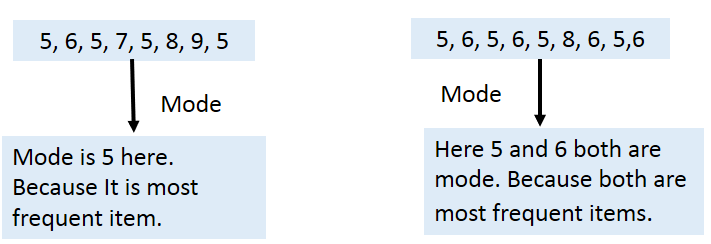
The mode is the value that occurs the most frequently in your data set. On a bar chart, the mode is the highest bar. If the data have multiple values that are tied for occurring the most frequently, you have a multimodal distribution. If no value repeats, the data do not have a mode.

#### Why do we calculate mode ?

The mode can be used to summarize categorical variables, while the mean and median can be calculated only for numeric variables. This is the main advantage of the mode as a measure of central tendency. It's also useful for discrete variables and for continuous variables when they are expressed as intervals.

In [39]:
df.mode()

state_code   latitude   longitude zip_code           city             name  \
0         CA  37.779281 -122.419236    94107  San Francisco  Redwood Systems   

   labels founded_at closed_at first_funding_at  ... is_othercategory  has_VC  \
0       1   1/1/2003  6/1/2013         1/1/2008  ...                0       0   

   has_angel  has_roundA  has_roundB  has_roundC  has_roundD  \
0          0           1           0           0           0   

   avg_participants  is_top500    status  
0               1.0          1  acquired  

[1 rows x 44 columns]

#### Here the mode of the status shows that most of the startups will acquired.

In [40]:
def mode_cal(df,int64_lst):
    
    cols = ['normal_value', 'zero_value', 'string_value']
    zero_value = 0
    normal_value = 0
    string_value = 0
    
    for value in int64_lst:
                
        rs = df[value].mode()[0]
        
        if isinstance(rs, str):
            string_value = string_value + 1
        else:

            if rs > 0:
                normal_value = normal_value + 1

            elif rs == 0:
                zero_value = zero_value + 1
    
    mode_total_df =  pd.DataFrame([[normal_value, zero_value, string_value]], columns=cols) 
    
    return mode_total_df

In [41]:
mode_cal(df, list(df.columns))

normal_value  zero_value  string_value
0            11          21            11

zero_value -> that the mode of a paticular column is zero which isn't usefull in anyway and need to be drop.

# Null and Nan values

1. **Null Values**


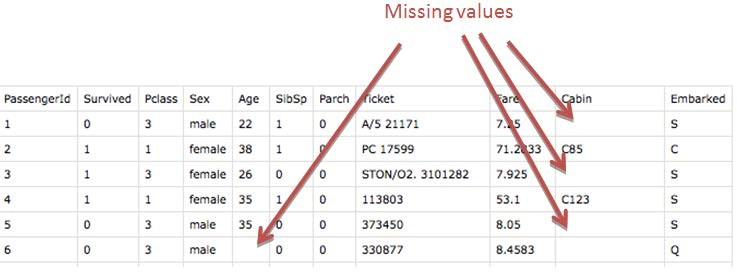

A null value in a relational database is used when the value in a column is unknown or missing. A null is neither an empty string (for character or datetime data types) nor a zero value (for numeric data types).

In [42]:
df.isnull().sum()

state_code                    0
latitude                      0
longitude                     0
zip_code                      0
city                          0
name                          0
labels                        0
founded_at                    0
closed_at                   588
first_funding_at              0
last_funding_at               0
age_first_funding_year        0
age_last_funding_year         0
age_first_milestone_year    152
age_last_milestone_year     152
relationships                 0
funding_rounds                0
funding_total_usd             0
milestones                    0
state_code.1                  1
is_CA                         0
is_NY                         0
is_MA                         0
is_TX                         0
is_otherstate                 0
category_code                 0
is_software                   0
is_web                        0
is_mobile                     0
is_enterprise                 0
is_advertising                0
is_games

As we notice that there are some null values in our dataset.

2. **Nan Values**

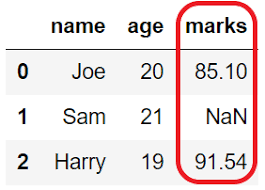

NaN, standing for Not a Number, is a member of a numeric data type that can be interpreted as a value that is undefined or unrepresentable, especially in floating-point arithmetic.

In [43]:
df.isna().sum()

state_code                    0
latitude                      0
longitude                     0
zip_code                      0
city                          0
name                          0
labels                        0
founded_at                    0
closed_at                   588
first_funding_at              0
last_funding_at               0
age_first_funding_year        0
age_last_funding_year         0
age_first_milestone_year    152
age_last_milestone_year     152
relationships                 0
funding_rounds                0
funding_total_usd             0
milestones                    0
state_code.1                  1
is_CA                         0
is_NY                         0
is_MA                         0
is_TX                         0
is_otherstate                 0
category_code                 0
is_software                   0
is_web                        0
is_mobile                     0
is_enterprise                 0
is_advertising                0
is_games

As we notice that there are some nan values in our dataset.

#### Another way to remove null and nan values is to use the method "df.dropna(inplace=True)". 

In [44]:
df.dropna(inplace=True)

# Count of unique occurences of every value in all categorical value



In [45]:
objects_cols = ['object']
objects_lst = list(df.select_dtypes(include=objects_cols).columns)
for value in objects_lst:
    
    print(f"{value:{10}} {df[value].value_counts()}")

state_code CA    112
NY     22
MA     18
WA     14
TX     12
IL      8
VA      5
OH      5
PA      4
NC      4
MI      3
NJ      3
CT      3
CO      3
MN      1
AR      1
ID      1
RI      1
UT      1
IN      1
TN      1
NH      1
GA      1
NV      1
MD      1
FL      1
WI      1
Name: state_code, dtype: int64
zip_code   94105             6
94025             5
94107             5
94043             5
98104             5
                 ..
94066             1
19004             1
94035             1
Maryland 21045    1
94089             1
Name: zip_code, Length: 154, dtype: int64
city       San Francisco    28
New York         18
Los Angeles      11
Austin           10
Seattle           9
                 ..
Columbia          1
Weston            1
Durham            1
Bingham Farms     1
Middleton         1
Name: city, Length: 99, dtype: int64
name       Inhale Digital           1
Shocking Technologies    1
Weatherista              1
Exit41                   1
HighlightCam             1
 

- Categorical data are variables that contain label values rather than numeric values.The number of possible values is often limited to a fixed set.
- Use Label Encoder to label the categorical data. Label Encoder is the part of SciKit Learn library in Python and used to convert categorical data, or text data, into numbers, which our predictive models can better understand.



__Label Encoding__ refers to converting the labels into a numeric form so as to convert them into the machine-readable form. Machine learning algorithms can then decide in a better way how those labels must be operated. It is an important pre-processing step for the structured dataset in supervised learning.

In [46]:
#Before Encoding
for value in objects_lst:
    print(value)
    print()
    print(df[value])
    print("------------------------------------------------")
    print()

state_code

4      CA
5      CA
11     CA
16     CA
19     CA
       ..
911    CA
913    TX
915    WI
919    MA
920    CA
Name: state_code, Length: 229, dtype: object
------------------------------------------------

zip_code

4      94105
5      94043
11     94025
16     94022
19     94301
       ...  
911    94080
913    77027
915    53562
919     1803
920    94089
Name: zip_code, Length: 229, dtype: object
------------------------------------------------

city

4            San Francisco
5            Mountain View
11              Menlo Park
16               Los Altos
19               Palo Alto
              ...         
911    South San Francisco
913                Houston
915              Middleton
919             Burlington
920              Sunnyvale
Name: city, Length: 229, dtype: object
------------------------------------------------

name

4          Inhale Digital
5        Matisse Networks
11               Center'd
16                QSecure
19           Bling Nation
         

In [47]:
#Encoding categorical data values
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for value in objects_lst:
    df[value] = le.fit_transform(df[value])

In [48]:
#After encoding or converting categorical col values into numbers
for value in objects_lst:
    print(value)
    print()
    print(df[value])
    print("------------------------------------------------")
    print()

state_code

4       1
5       1
11      1
16      1
19      1
       ..
911     1
913    22
915    26
919     9
920     1
Name: state_code, Length: 229, dtype: int32
------------------------------------------------

zip_code

4      118
5      107
11     104
16     103
19     124
      ... 
911    112
913     68
915     53
919     18
920    115
Name: zip_code, Length: 229, dtype: int32
------------------------------------------------

city

4      77
5      50
11     46
16     41
19     59
       ..
911    87
913    33
915    47
919    11
920    88
Name: city, Length: 229, dtype: int32
------------------------------------------------

name

4       90
5      114
11      27
16     159
19      16
      ... 
911    104
913    168
915    194
919    163
920    144
Name: name, Length: 229, dtype: int32
------------------------------------------------

founded_at

4      73
5       7
11     11
16      8
19     12
       ..
911     9
913    22
915    35
919     3
920     4
Name: founded_at, Le

1 ~ closed,
0 ~ acquired

# Skewness 

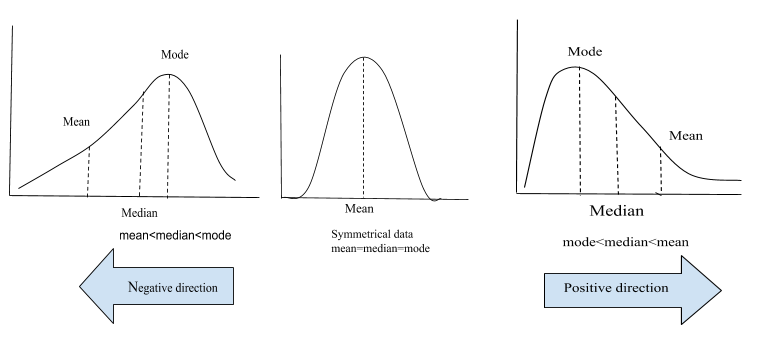

Skewness is a measure of the asymmetry of a distribution. A distribution is asymmetrical when its left and right side are not mirror images. A distribution can have right (or positive), left (or negative), or zero skewness

#### Why do we calculate Skewness ?

Skewness gives the direction of the outliers if it is right-skewed, most of the outliers are present on the right side of the distribution while if it is left-skewed, most of the outliers will present on the left side of the distribution

#### Below is the function to calculate skewness. 

In [49]:
def right_nor_left(df, int64_lst):
    
    temp_skewness = ['column', 'skewness_value', 'skewness (+ve or -ve)']
    temp_skewness_values  = []
    
    temp_total = ["positive (+ve) skewed", "normal distrbution" , "negative (-ve) skewed"]
    positive = 0
    negative = 0
    normal = 0
    
    for value in int64_lst:
    
        rs = round(df[value].skew(),4)

        if rs > 0:
            temp_skewness_values.append([value,rs , "positive (+ve) skewed"])   
            positive = positive + 1

        elif rs == 0:
            temp_skewness_values.append([value,rs,"normal distrbution"])
            normal = normal + 1

        elif rs < 0:
            temp_skewness_values.append([value,rs, "negative (-ve) skewed"])
            negative = negative + 1
    
    skewness_df =  pd.DataFrame(temp_skewness_values, columns=temp_skewness) 
    skewness_total_df =  pd.DataFrame([[positive, normal, negative]], columns=temp_total) 
    
    return skewness_df, skewness_total_df

In [50]:
float64_cols = ['float64']
float64_lst_col = list(df.select_dtypes(include=float64_cols).columns)

skew_df,skew_total_df = right_nor_left(df, float64_lst_col)

In [51]:
skew_df

column  skewness_value  skewness (+ve or -ve)
0                  latitude          0.2732  positive (+ve) skewed
1                 longitude          0.7453  positive (+ve) skewed
2    age_first_funding_year          2.2976  positive (+ve) skewed
3     age_last_funding_year          1.5097  positive (+ve) skewed
4  age_first_milestone_year          2.2169  positive (+ve) skewed
5   age_last_milestone_year          1.7121  positive (+ve) skewed
6          avg_participants          1.7726  positive (+ve) skewed

In [52]:
skew_total_df

positive (+ve) skewed  normal distrbution  negative (-ve) skewed
0                      7                   0                      0

In [53]:
int64_cols = ['int64','int32']
int64_lst_col = list(df.select_dtypes(include=int64_cols).columns)

skew_df,skew_total_df = right_nor_left(df, int64_lst_col)

In [54]:
skew_df

column  skewness_value  skewness (+ve or -ve)
0          state_code          0.6951  positive (+ve) skewed
1            zip_code         -0.3258  negative (-ve) skewed
2                city         -0.4559  negative (-ve) skewed
3                name          0.0000     normal distrbution
4              labels          4.7732  positive (+ve) skewed
5          founded_at          0.8839  positive (+ve) skewed
6           closed_at         -0.1036  negative (-ve) skewed
7    first_funding_at          0.0214  positive (+ve) skewed
8     last_funding_at          0.0141  positive (+ve) skewed
9       relationships          2.3358  positive (+ve) skewed
10     funding_rounds          1.9159  positive (+ve) skewed
11  funding_total_usd          8.4931  positive (+ve) skewed
12         milestones          1.1319  positive (+ve) skewed
13       state_code.1          0.6951  positive (+ve) skewed
14              is_CA          0.0440  positive (+ve) skewed
15              is_NY          2.7595  positive (+ve) skewed
16              is_MA          3.1524  positive (+ve) skewed
17              is_TX          4.0438  positive (+ve) skewed
18      is_otherstate          0.9652  positive (+ve) skewed
19      category_code         -0.0986  negative (-ve) skewed
20        is_software          2.1457  positive (+ve) skewed
21             is_web          1.6470  positive (+ve) skewed
22          is_mobile          2.5975  positive (+ve) skewed
23      is_enterprise          3.3968  positive (+ve) skewed
24     is_advertising          3.6878  positive (+ve) skewed
25      is_gamesvideo          3.0437  positive (+ve) skewed
26       is_ecommerce          4.0438  positive (+ve) skewed
27         is_biotech          5.9716  positive (+ve) skewed
28   is_othercategory          0.9652  positive (+ve) skewed
29             has_VC          0.5959  positive (+ve) skewed
30          has_angel          0.6362  positive (+ve) skewed
31         has_roundA          0.2932  positive (+ve) skewed
32         has_roundB          1.0387  positive (+ve) skewed
33         has_roundC          2.0401  positive (+ve) skewed
34         has_roundD          4.4956  positive (+ve) skewed
35          is_top500         -0.7399  negative (-ve) skewed
36             status         -4.7732  negative (-ve) skewed

In [55]:
skew_total_df

positive (+ve) skewed  normal distrbution  negative (-ve) skewed
0                     30                   1                      6

We notice with the above results that we have following details:
1. 37 columns are positive skewed
2. 6 columns are negative skewed
3. 1 columns are normal skewed

### Step 3 Insights: - 

With the statistical analysis we have found that the data have a lot of skewness in them all the columns are positively skewed with mostly zero variance.

Statistical analysis is little difficult to understand at one glance so to make it more understandable we will perform visulatization on the data which will help us to understand the process easily.

### Why we are calculating all these metrics? 

Mean / Median /Mode/ Variance /Standard Deviation are all very basic but very important concept of statistics used in data science. Almost all the machine learning algorithm uses these concepts in data preprocessing steps. These concepts are part of descriptive statistics where we basically used to describe and understand the data for features in Machine learning

### What does it take to build a successful company?

Launching a successful tech startup is a complex endeavor that depends upon many and many factors. Some are internal and can be controlled. Think of the quality of the product, the innovation, or the relentless customer focus. Some others are external, thus cannot be controlled. Think about timing, the success of a complementary technology that allows yours to thrive and so on. In this article, I want to focus on five factors that Bill Gross, founder of Idealab and GoTo (afterward named Overture) identified. It is important to remark this analysis is not “scientific” in the strict sense as Bill Gross applied subjective parameters to each factor in consideration. However, overall I think it is a good starting point to understand what makes a tech startup successful. More precisely Bill Gross identified five factors that are critical for any startup success:

- Ideas
- Team
- Business model
- Funding
- Timing

# Step 4: Data Exploration
**Goal/Purpose:**

Graphs we are going to develop in this step

1. Histogram of all columns to check the distrubution of the columns
2. Distplot or distribution plot of all columns to check the variation in the data distribution
3. Heatmap to calculate correlation within feature variables
4. Boxplot to find out outlier in the feature columns

# 1. Histogram

A histogram is a bar graph-like representation of data that buckets a range of classes into columns along the horizontal x-axis.The vertical y-axis represents the number count or percentage of occurrences in the data for each column

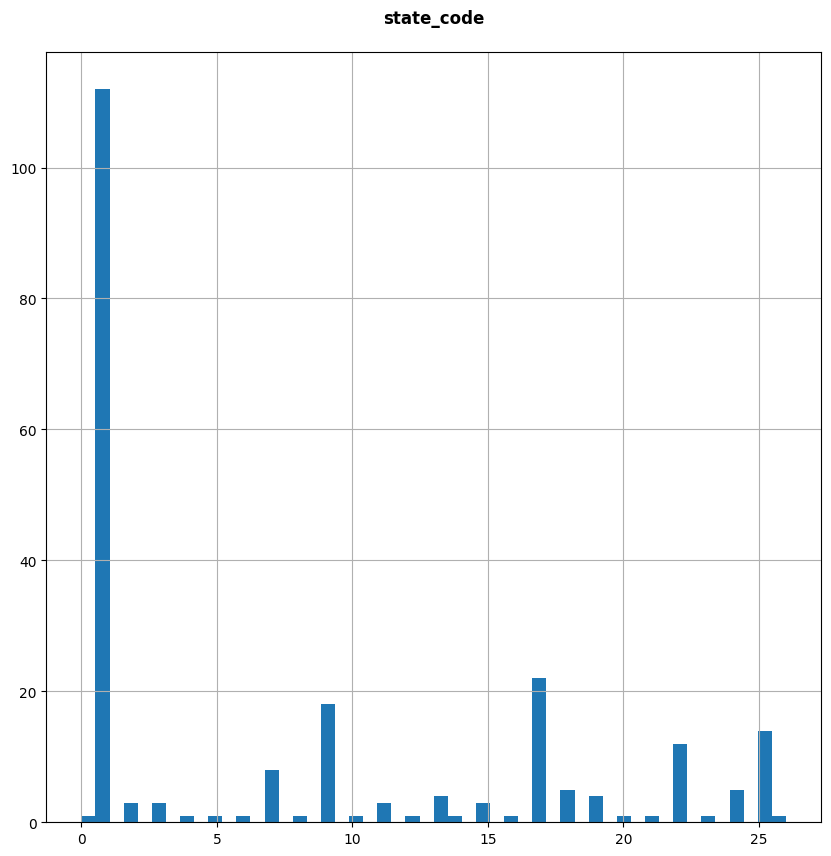

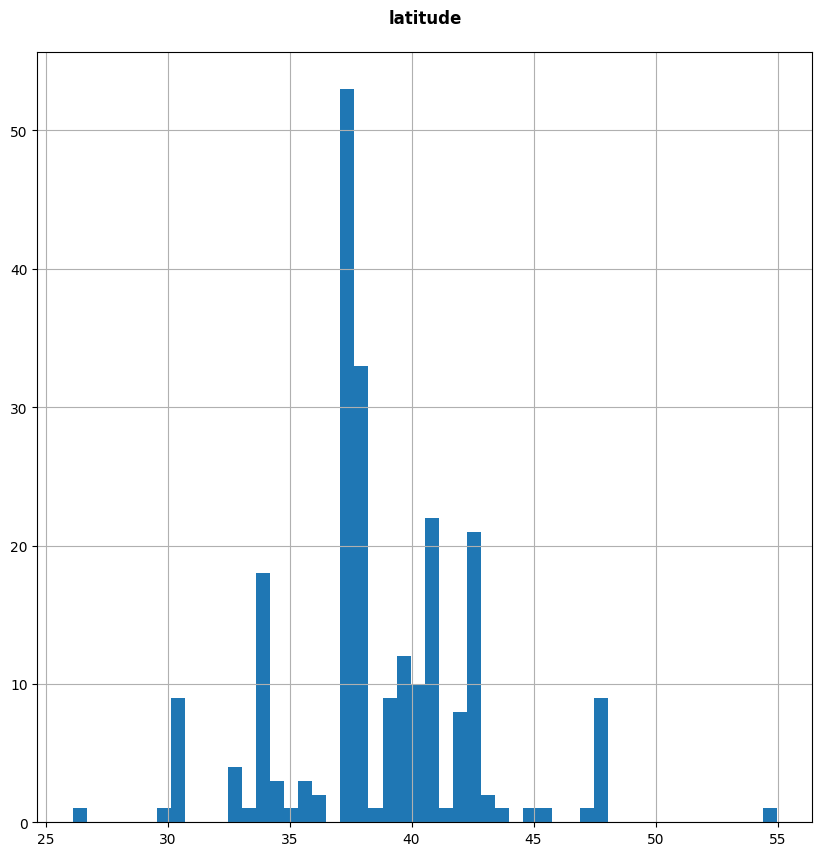

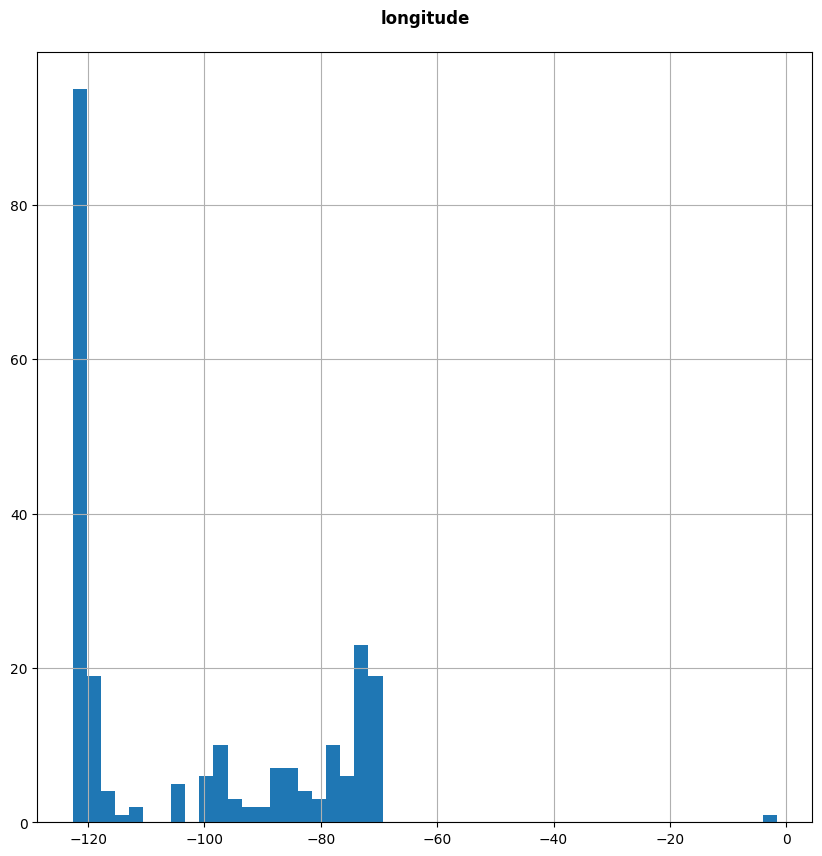

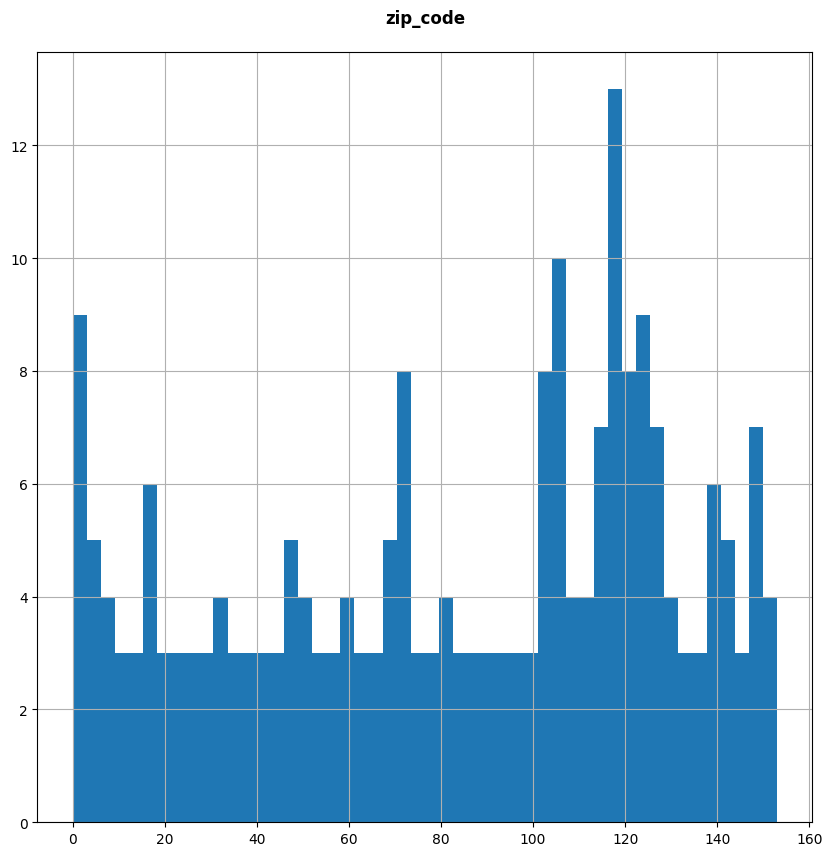

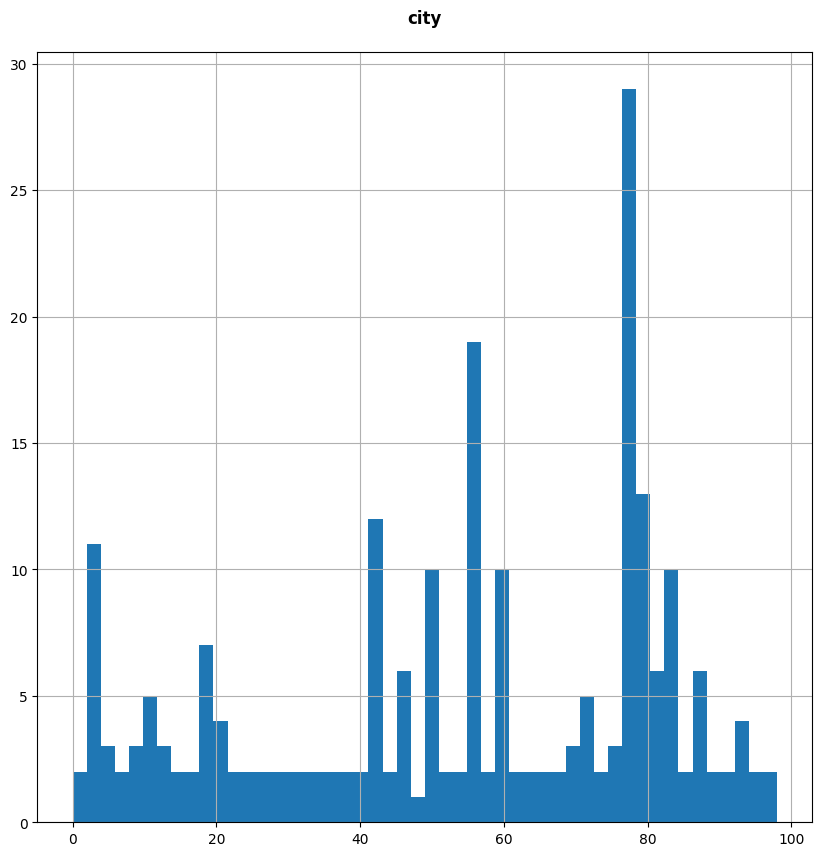

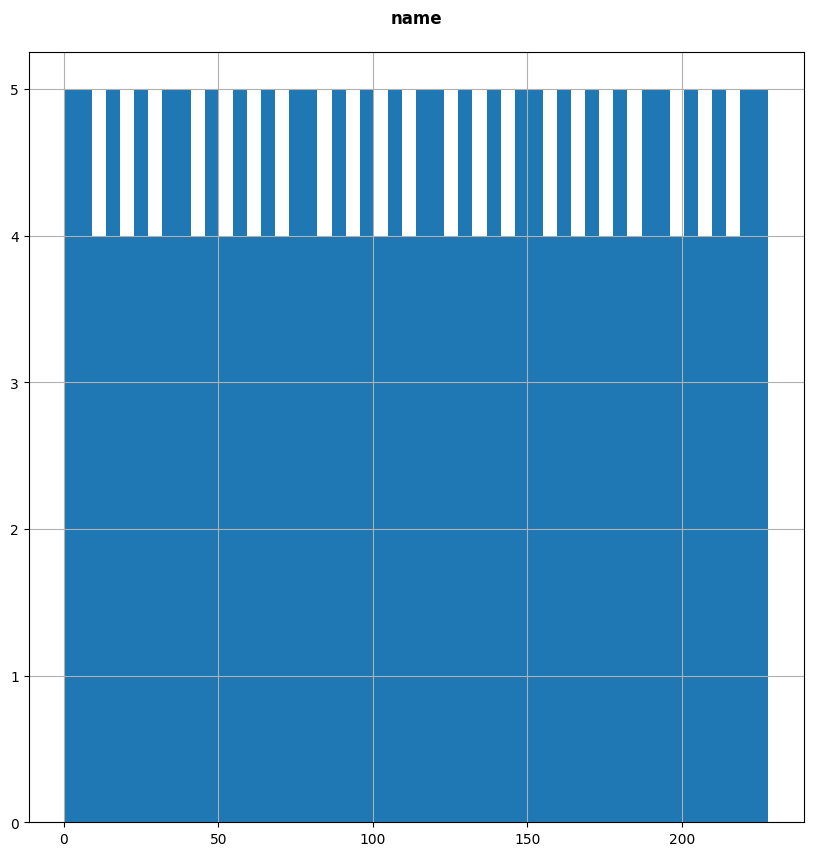

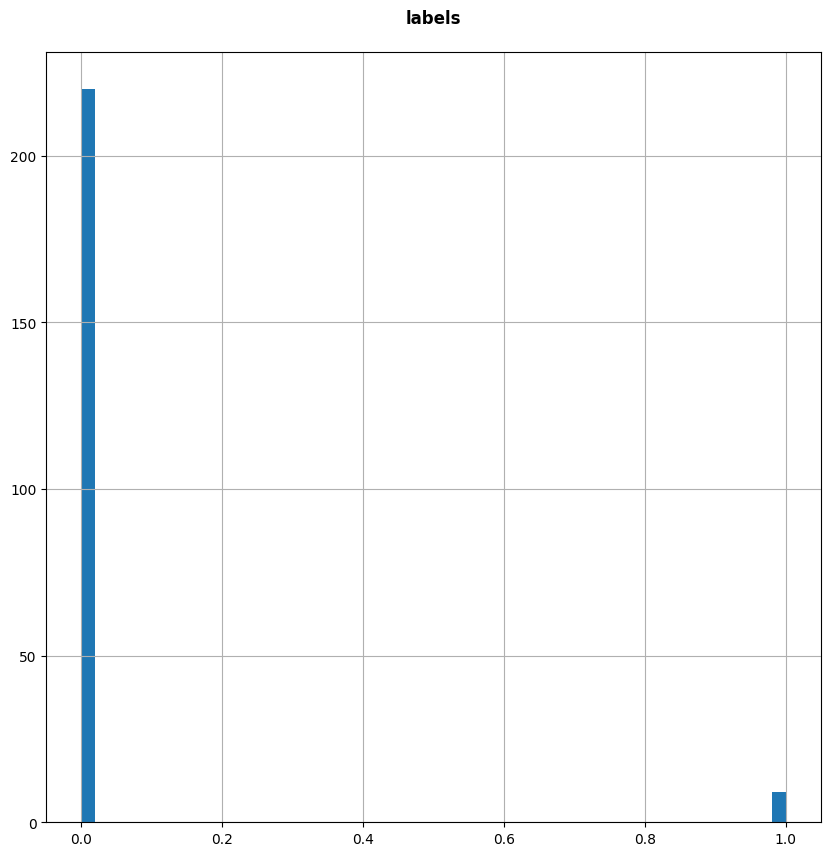

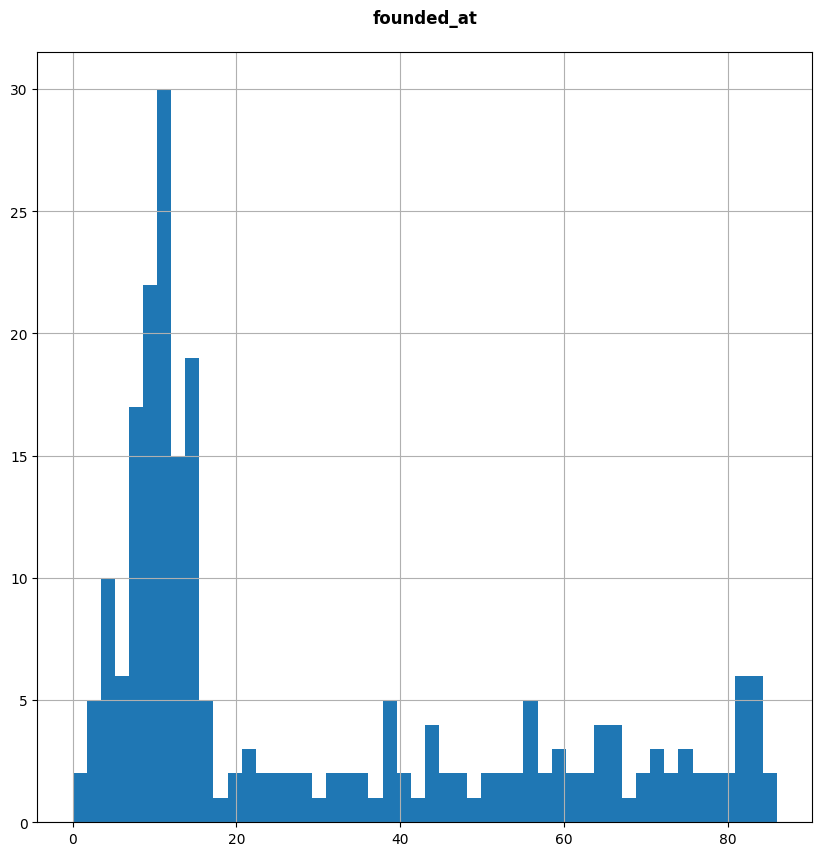

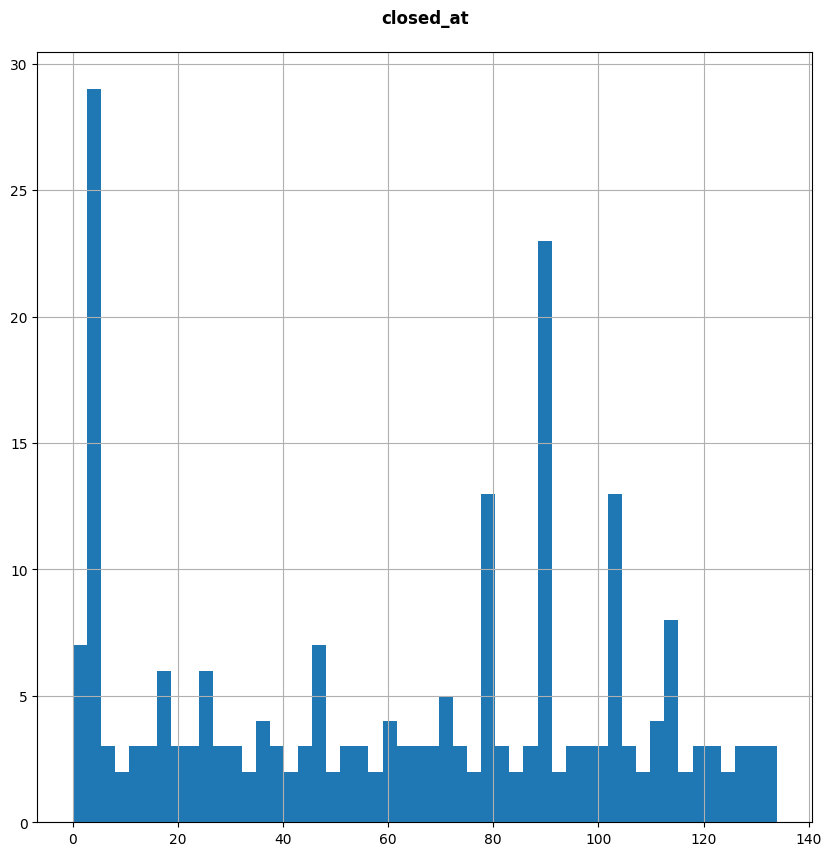

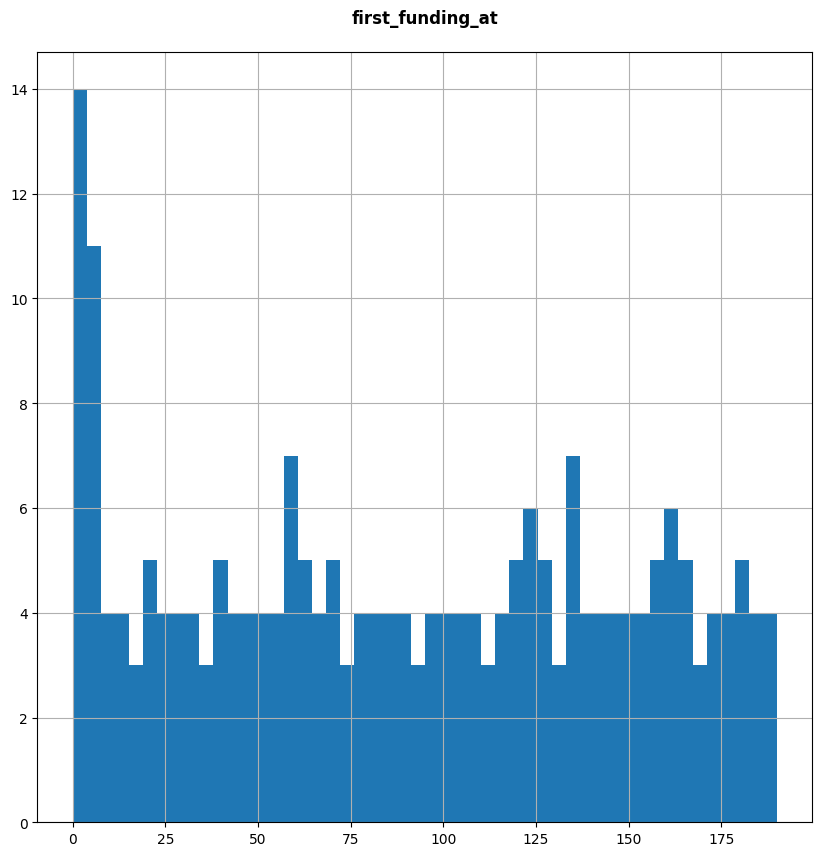

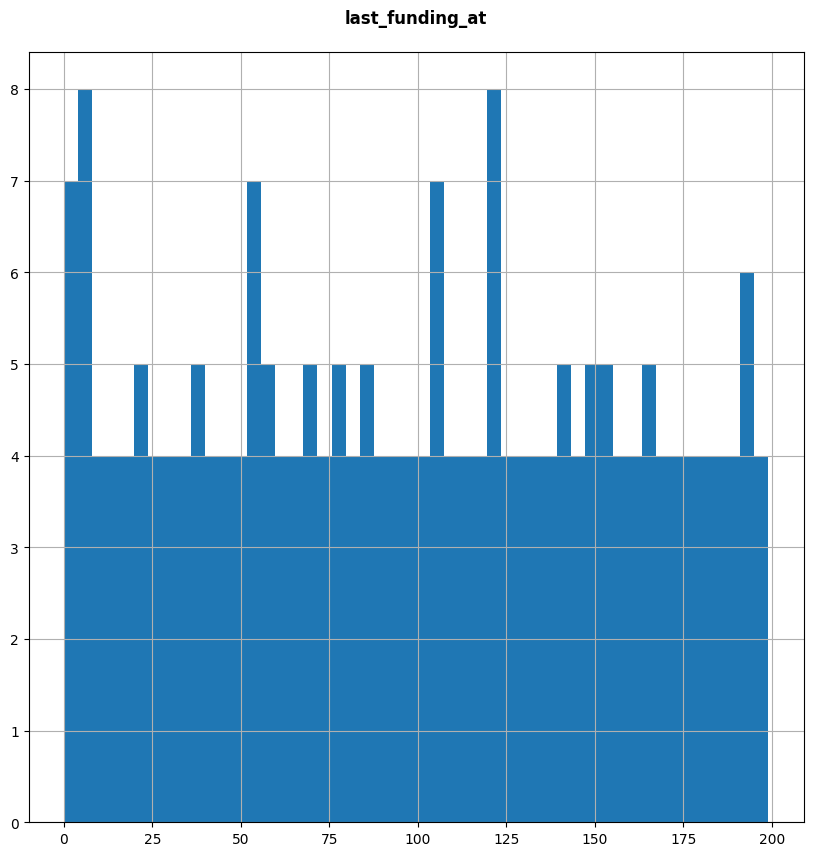

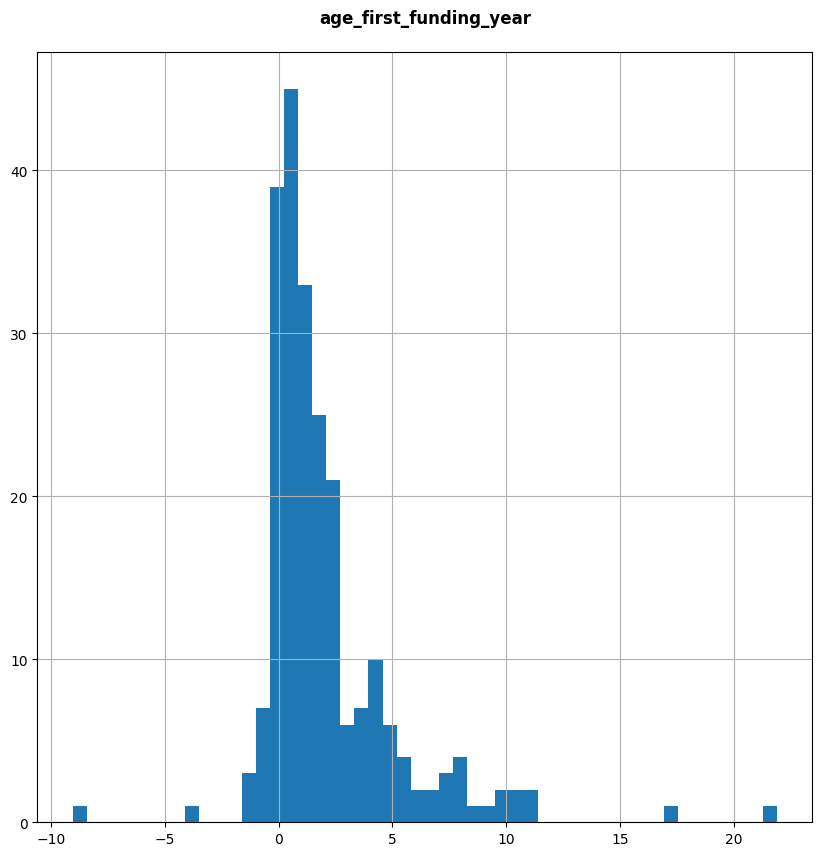

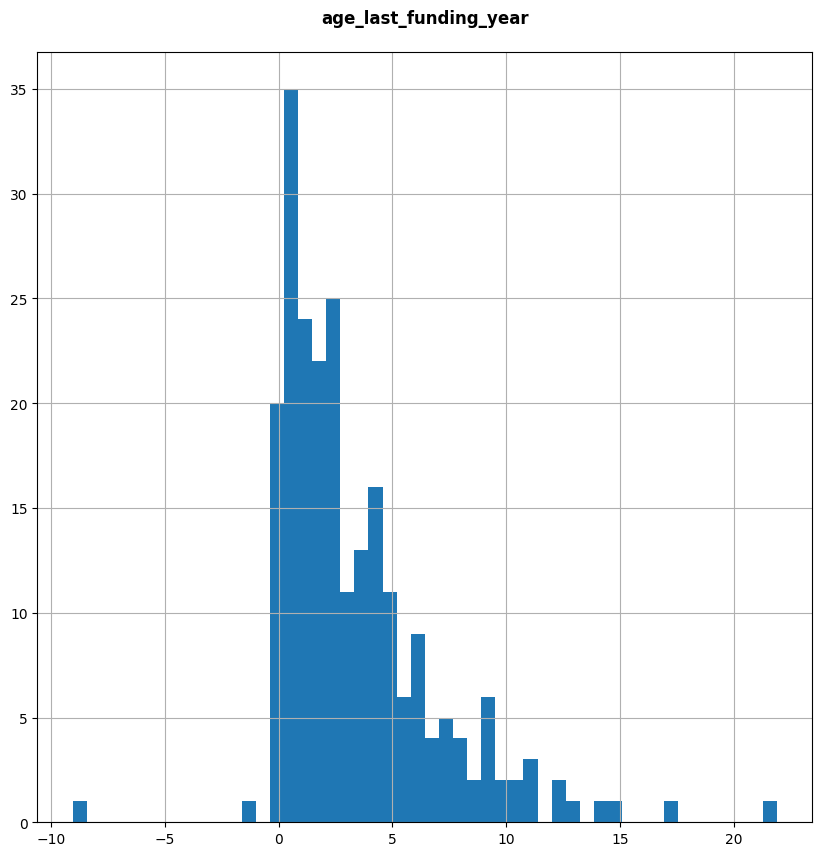

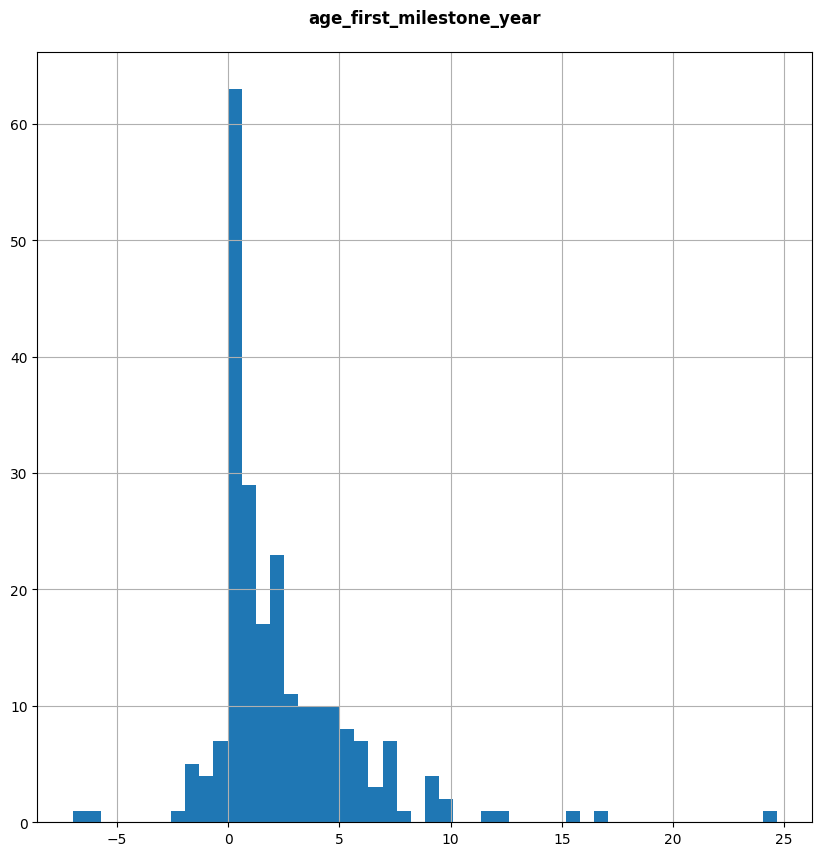

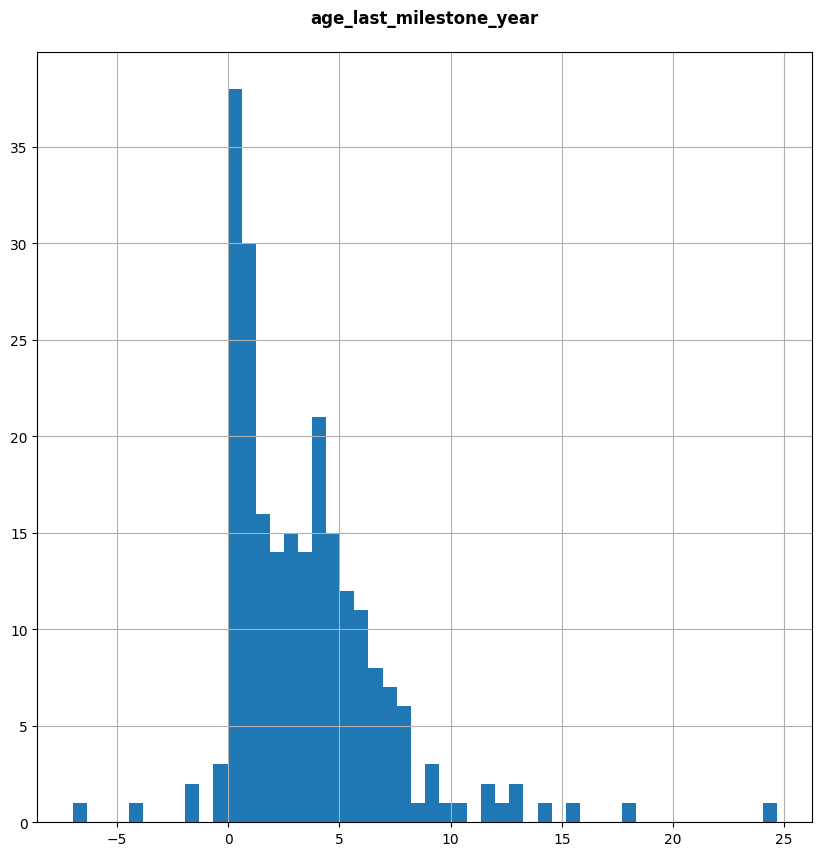

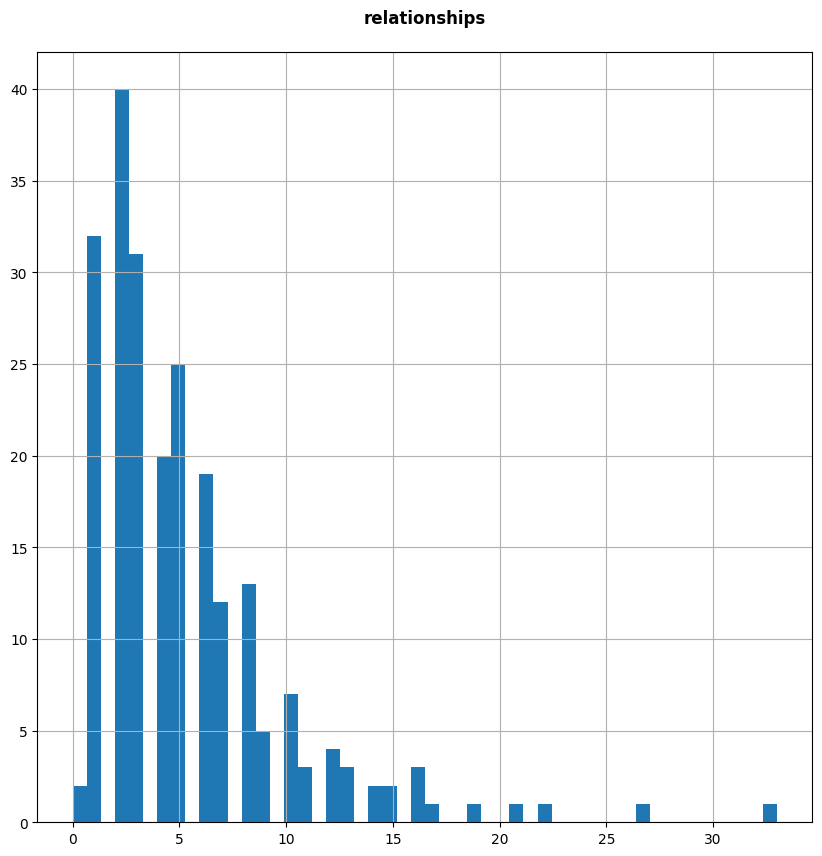

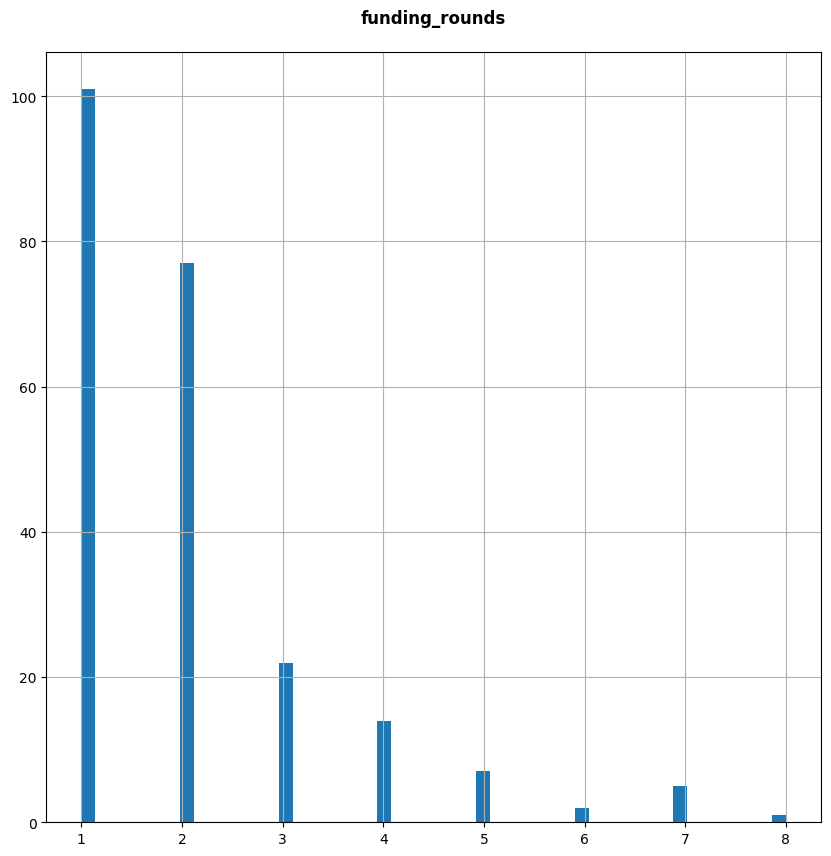

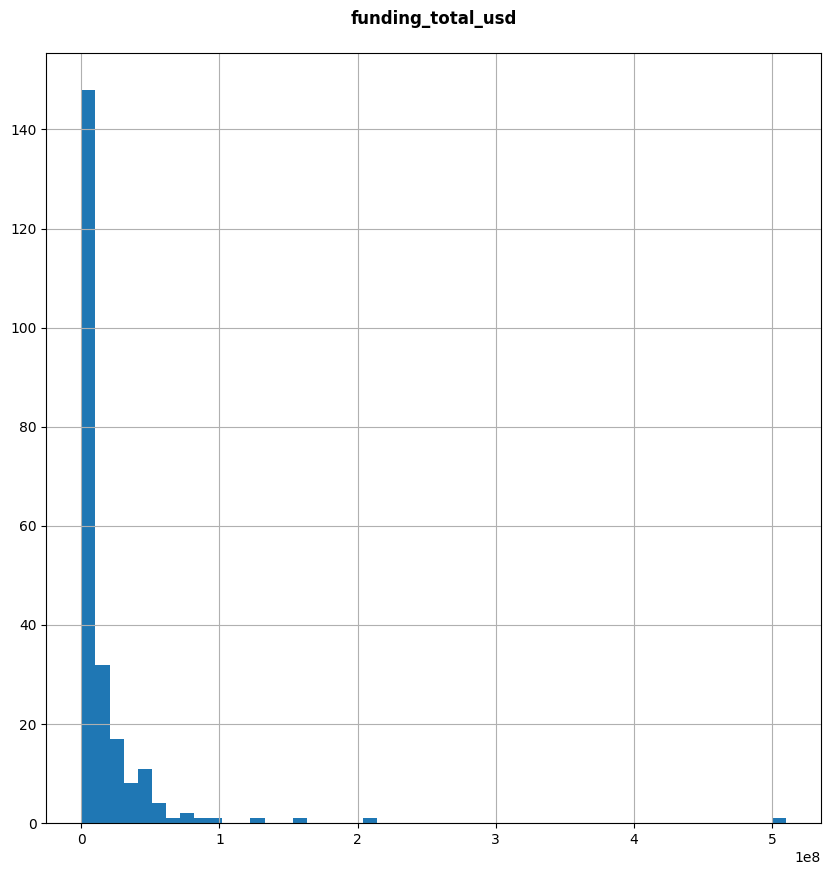

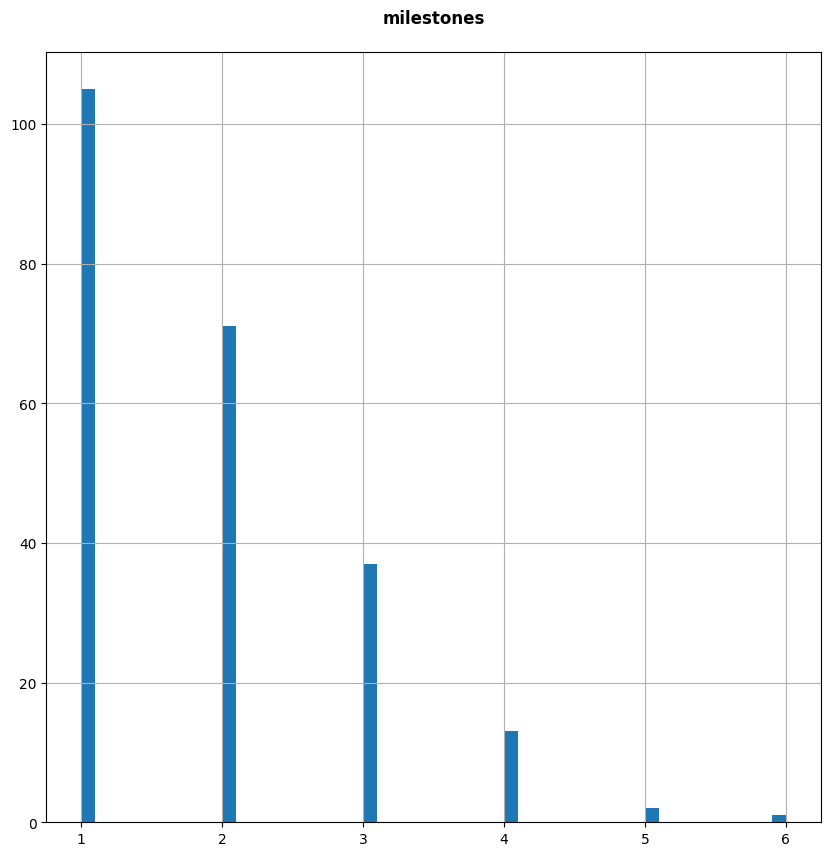

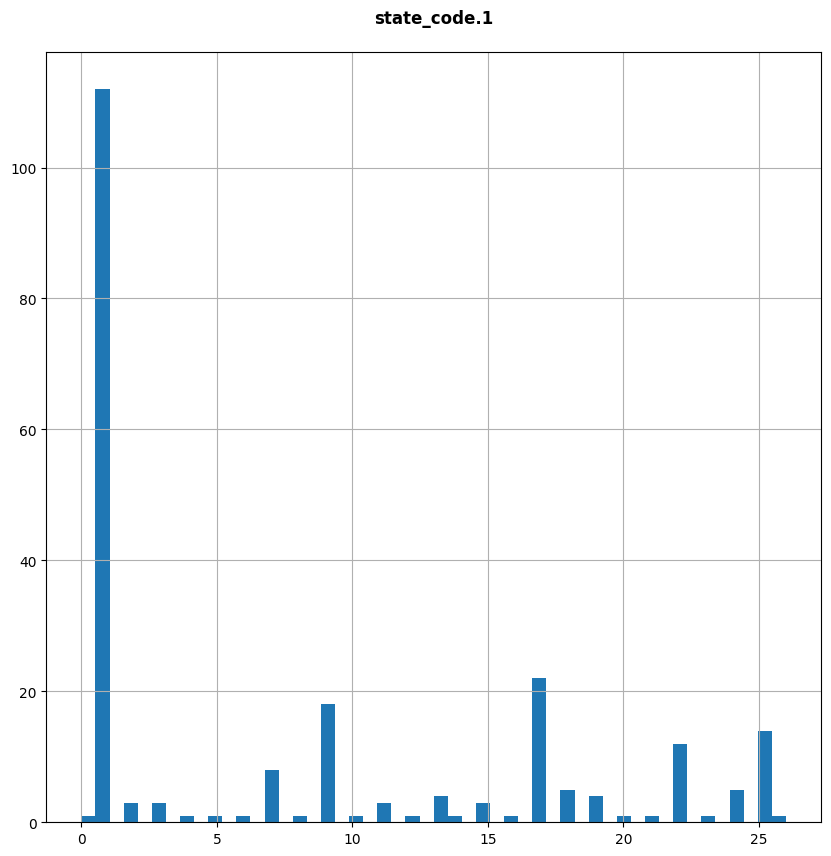

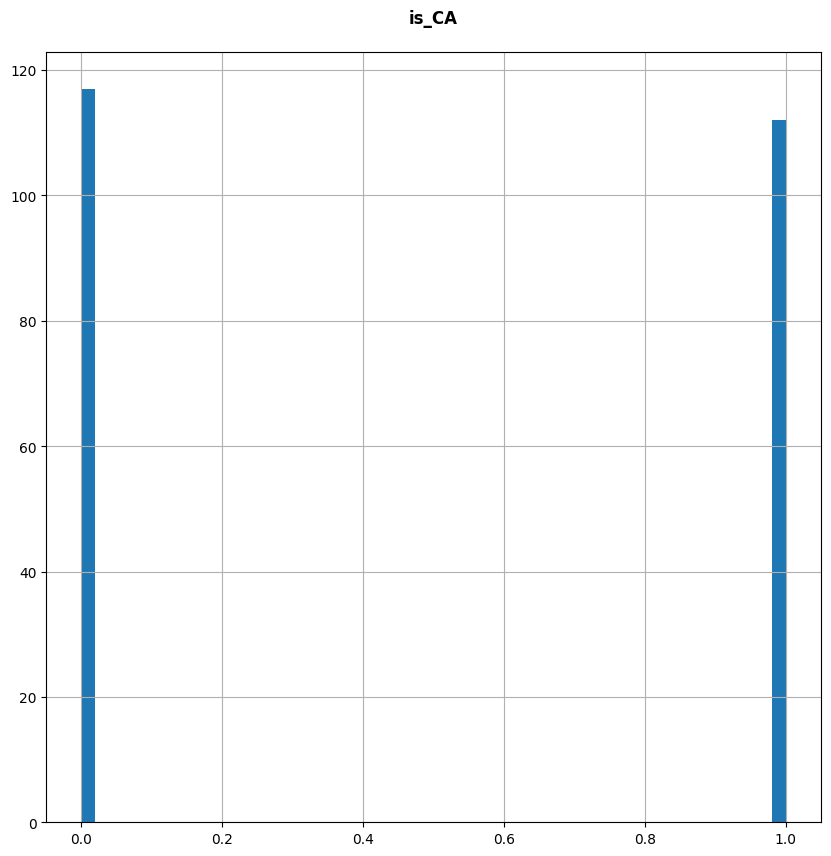

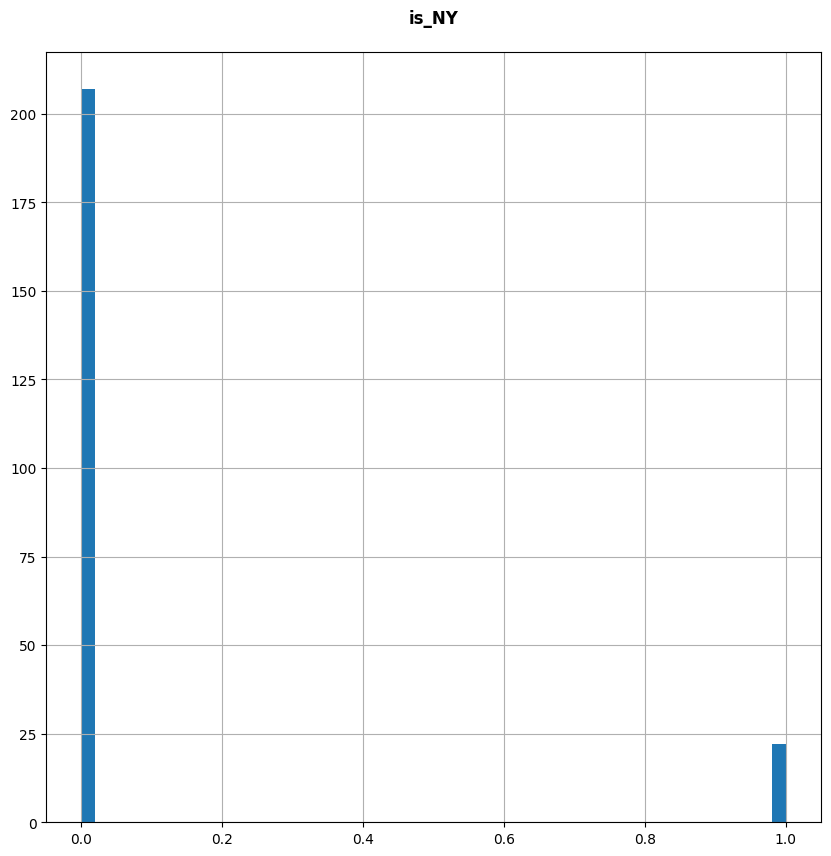

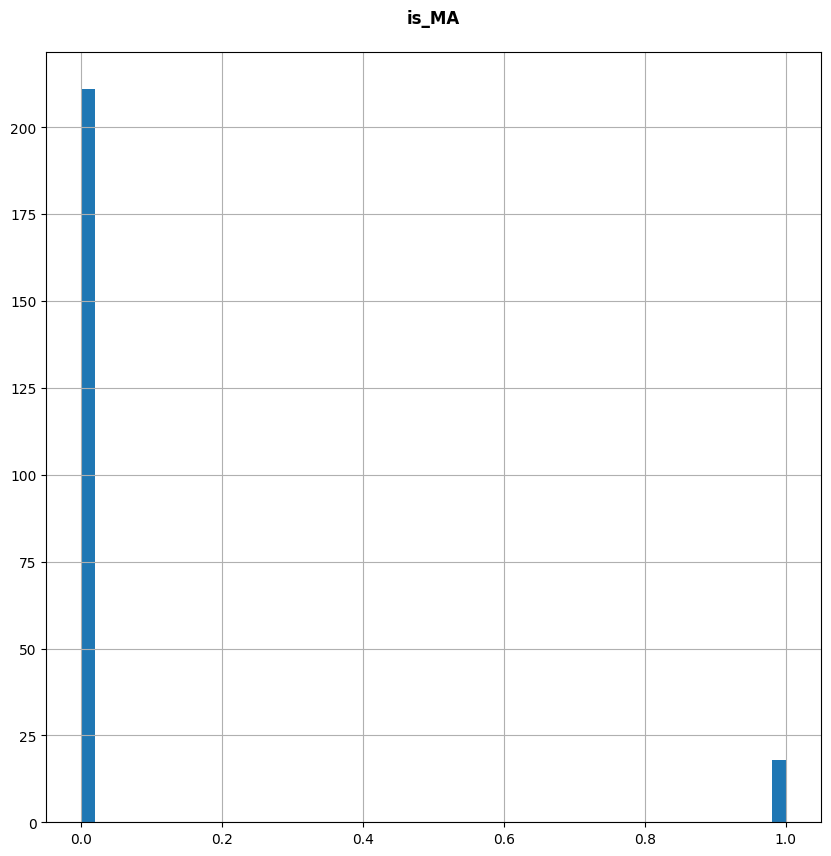

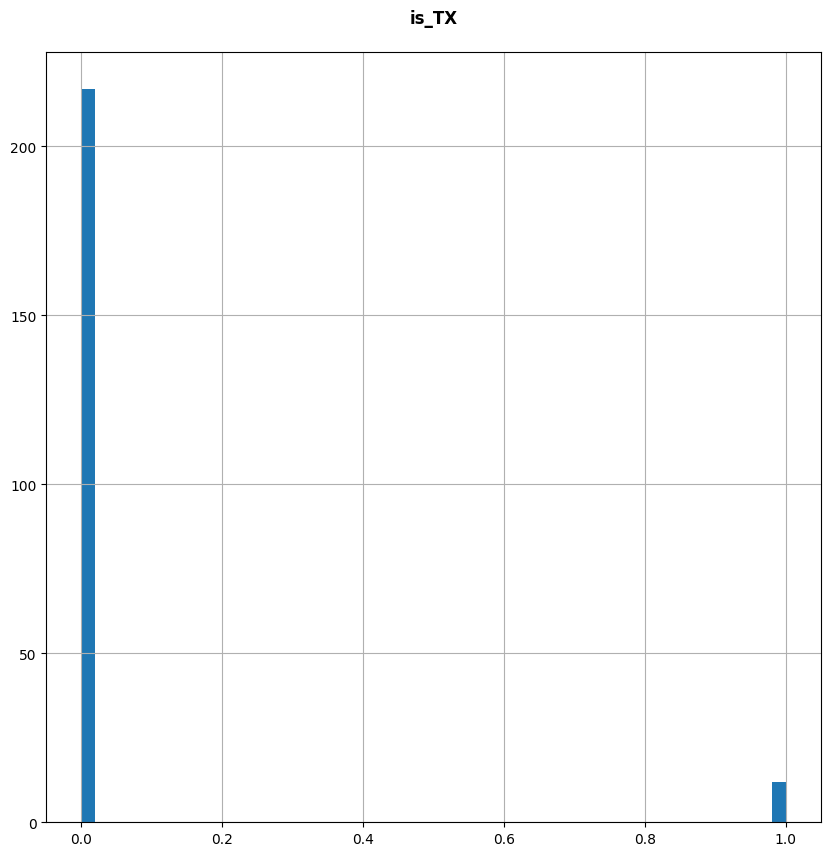

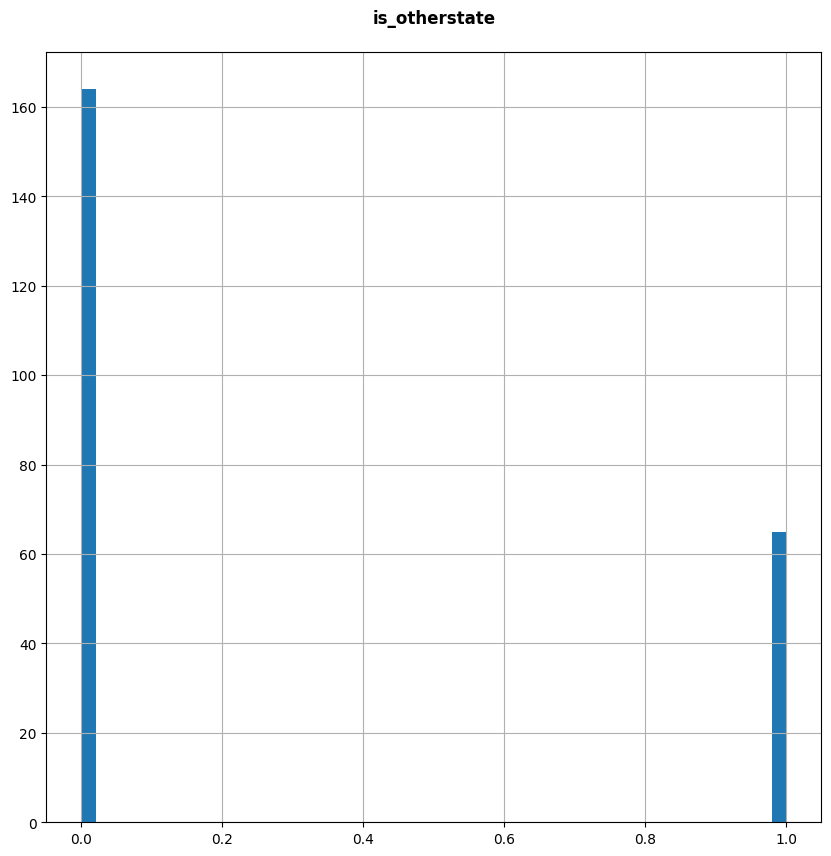

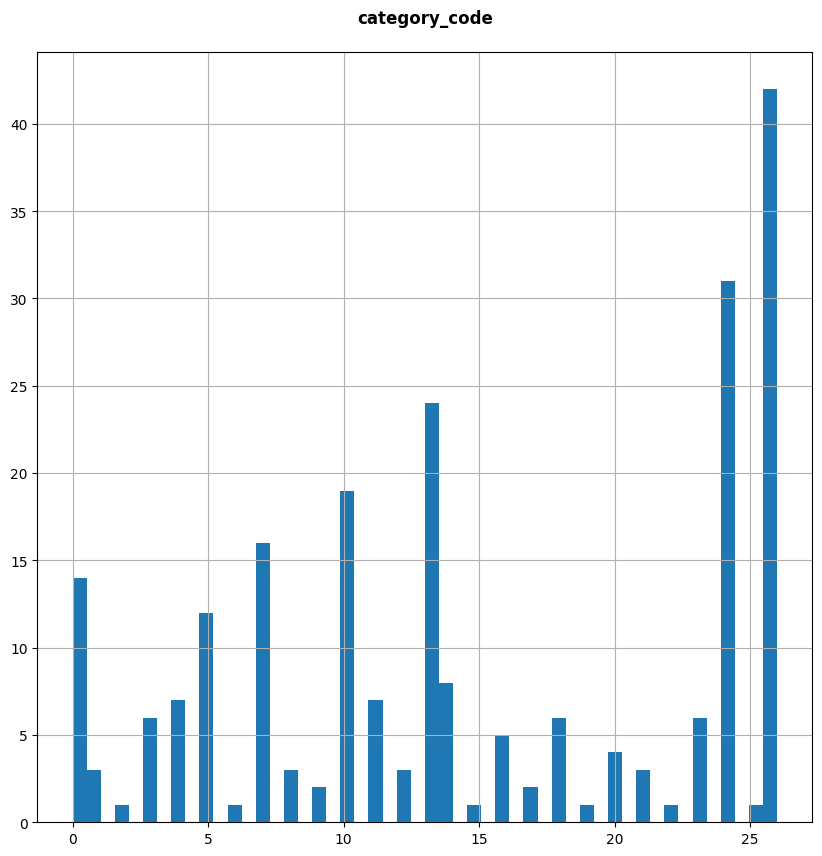

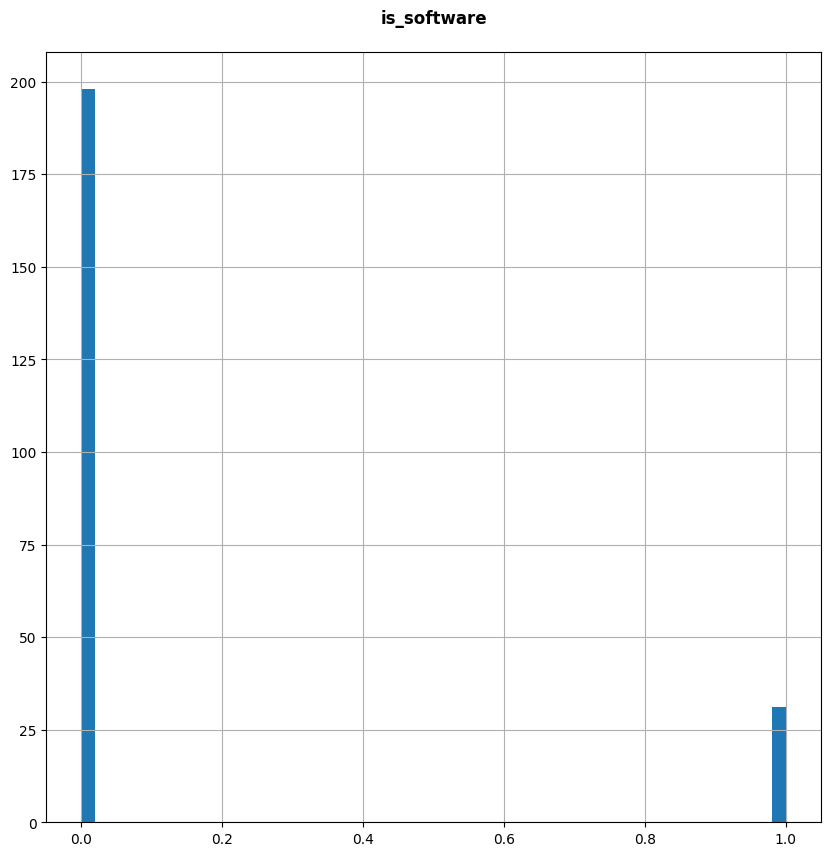

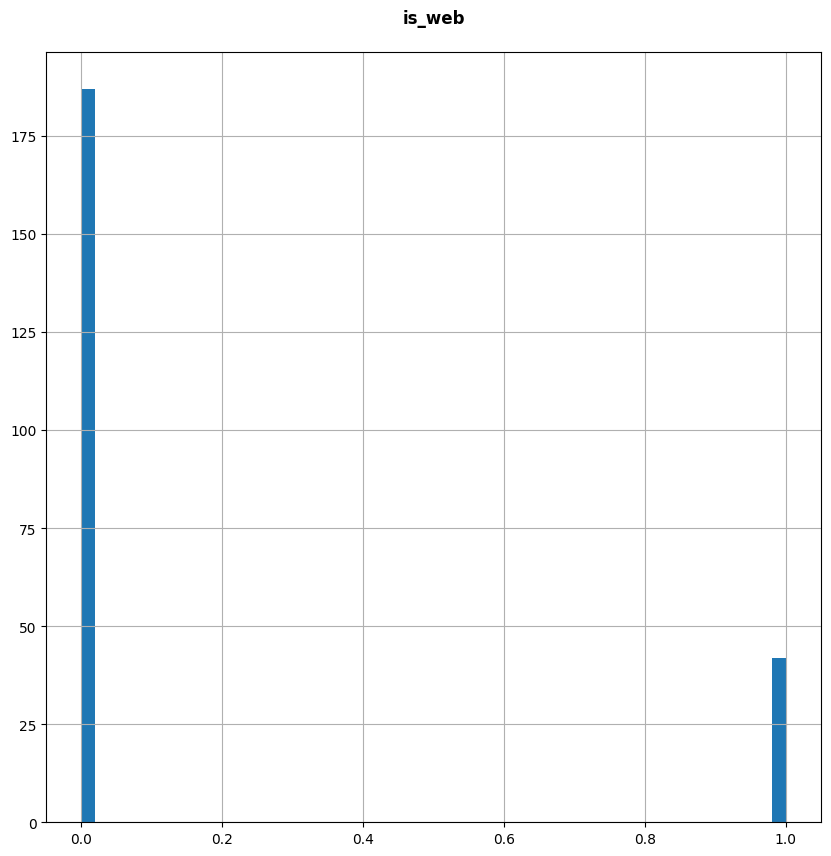

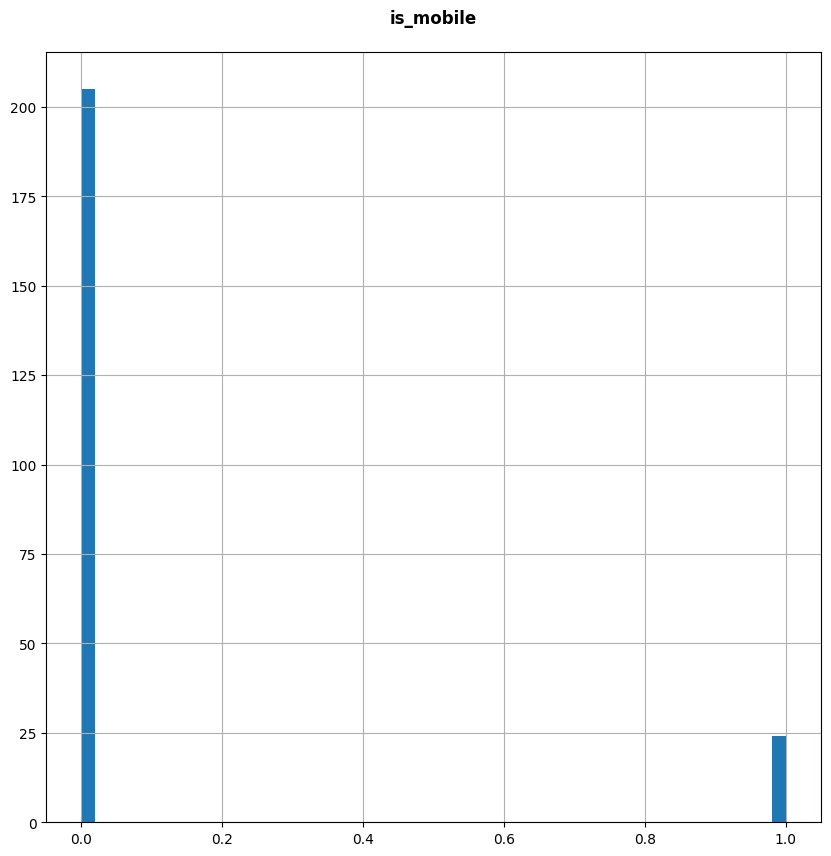

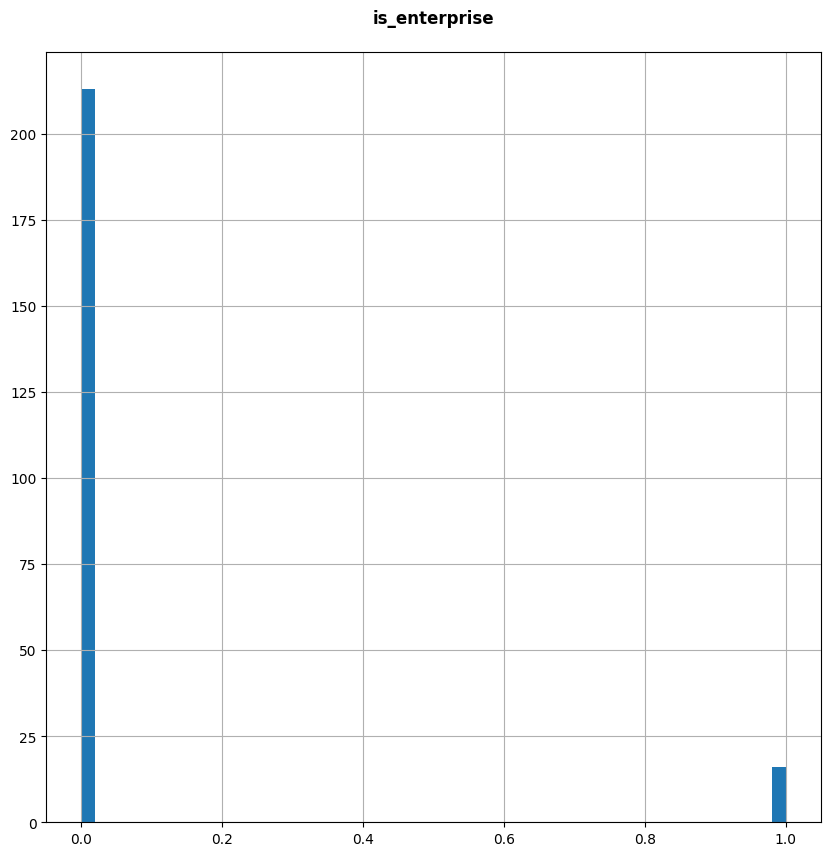

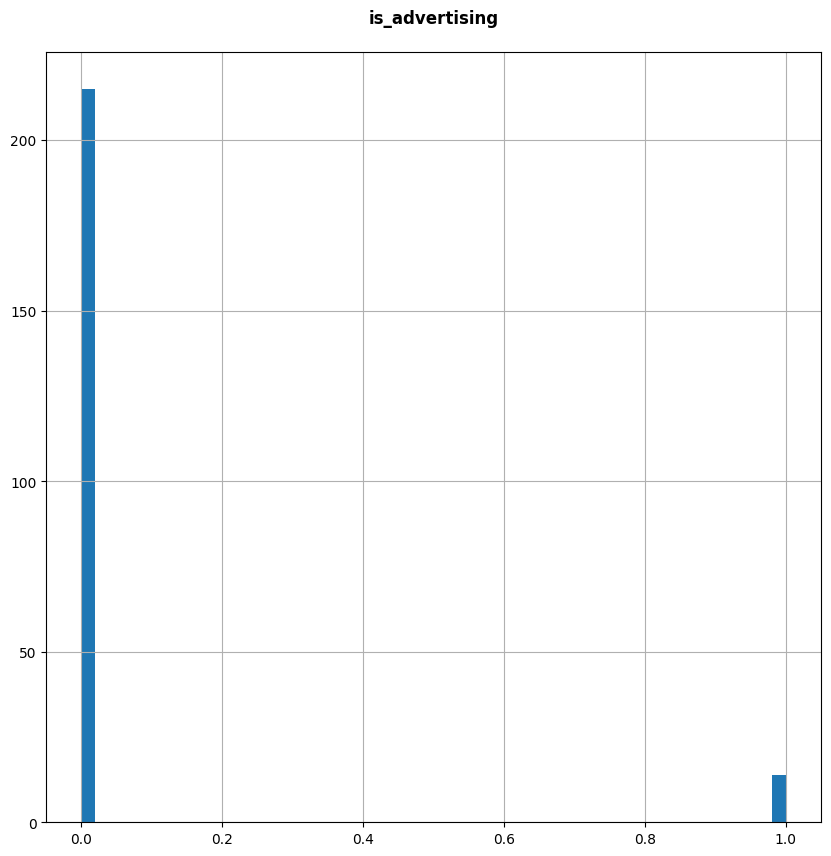

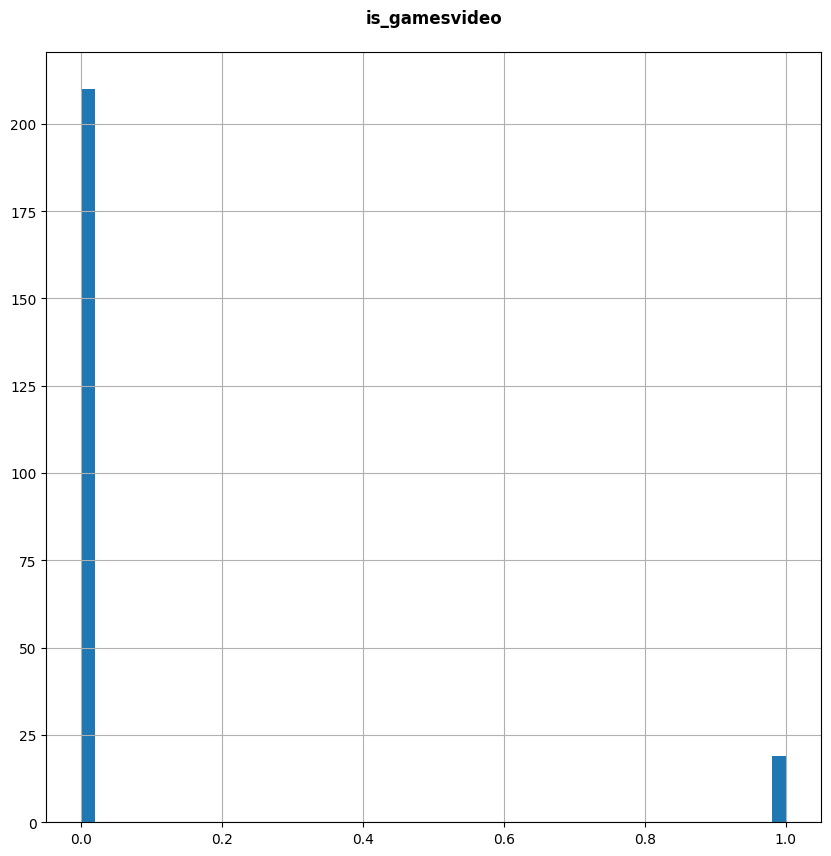

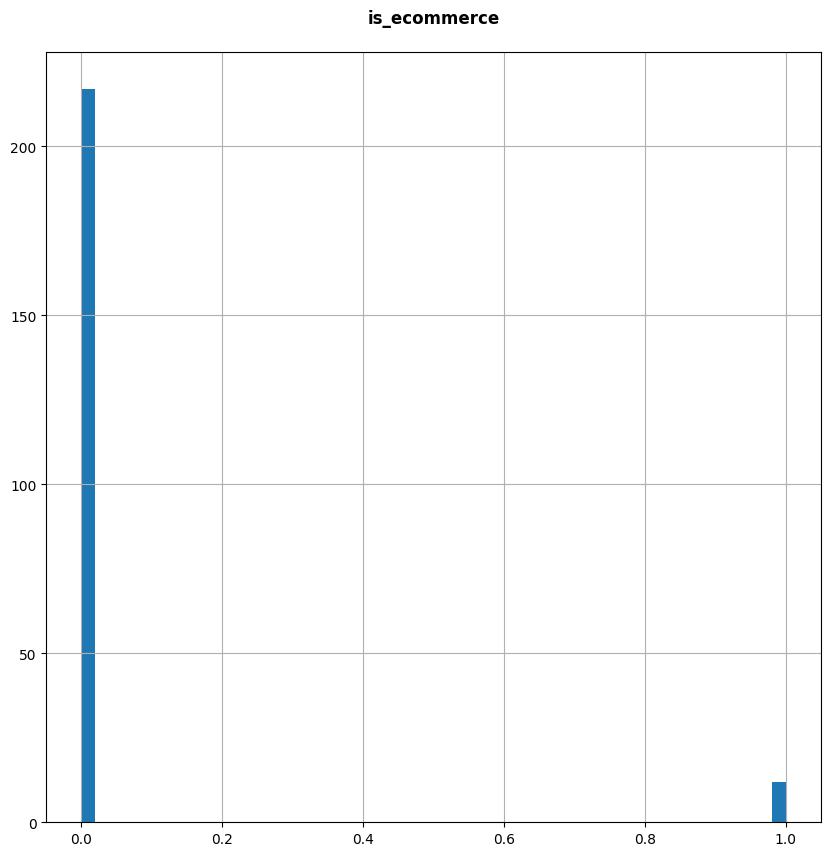

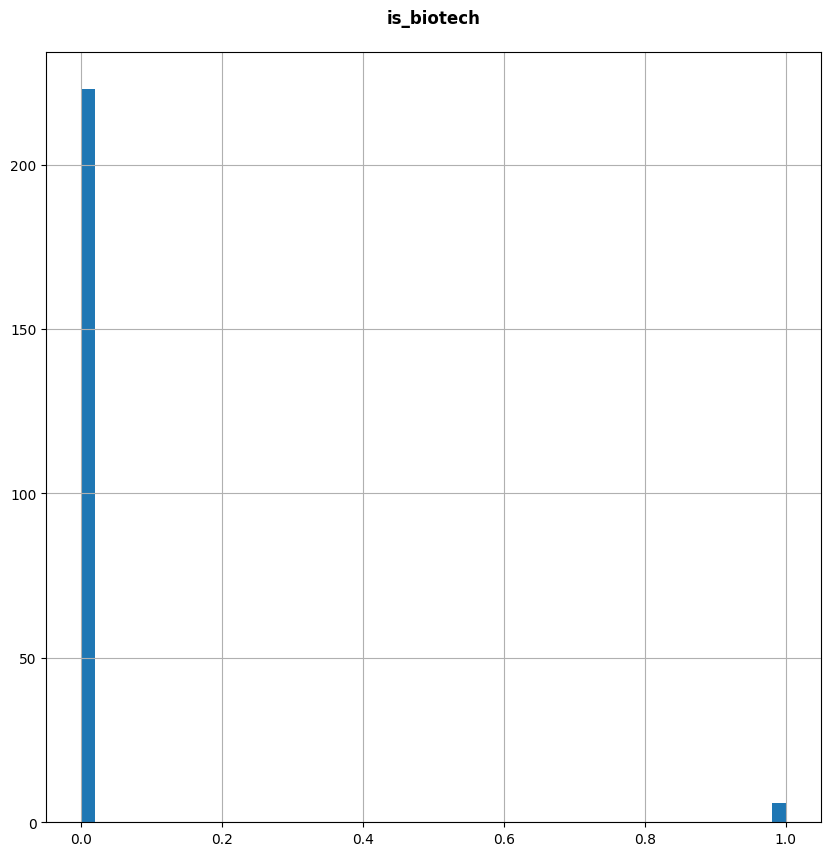

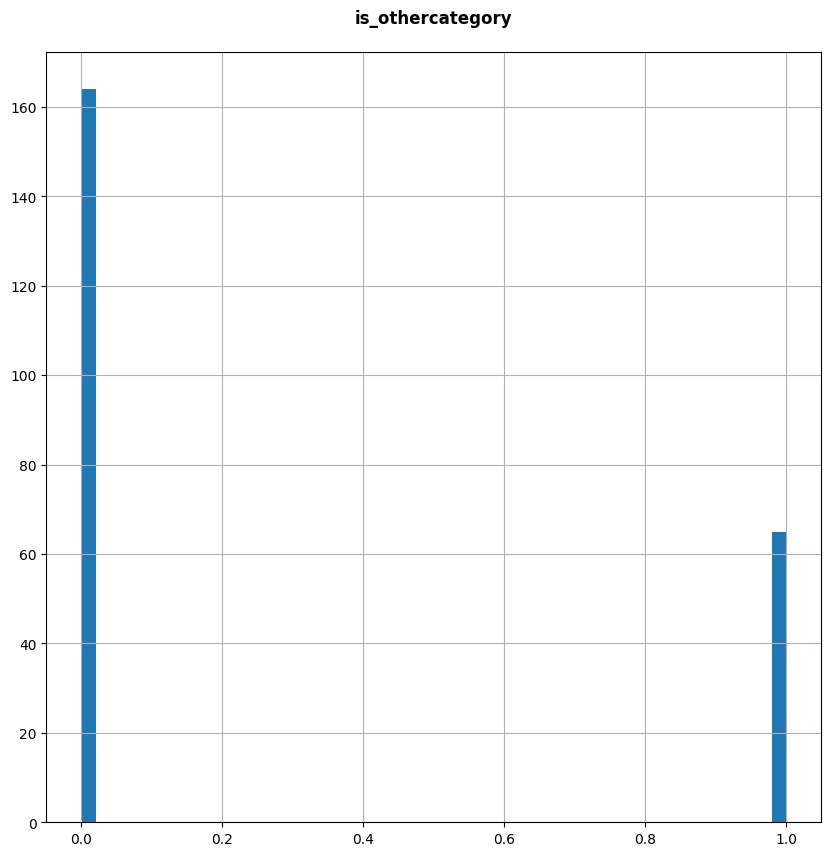

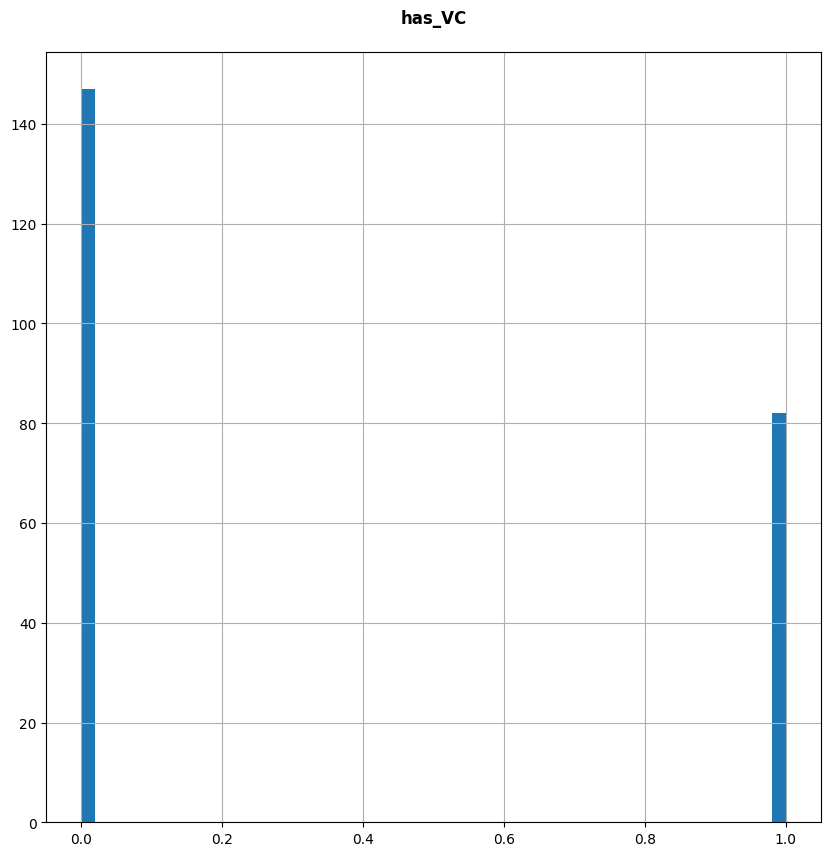

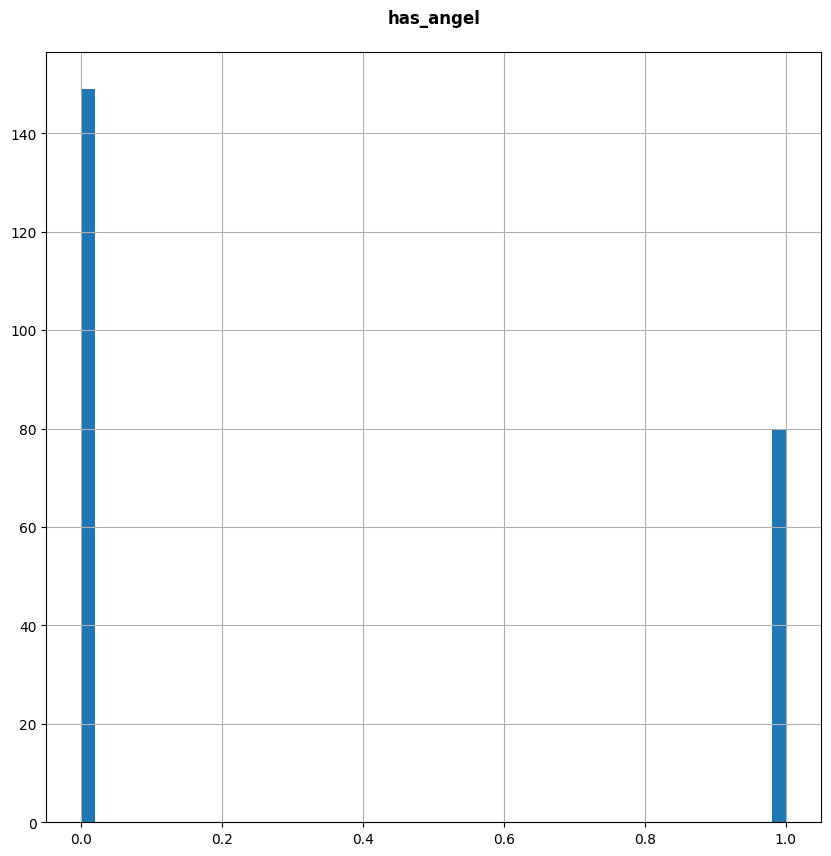

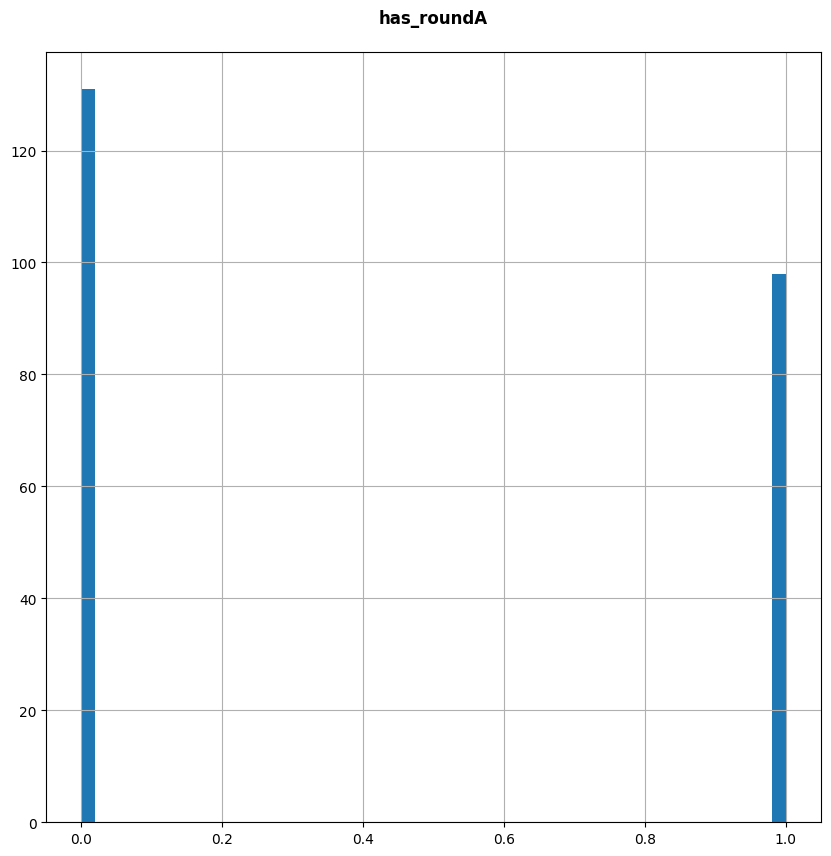

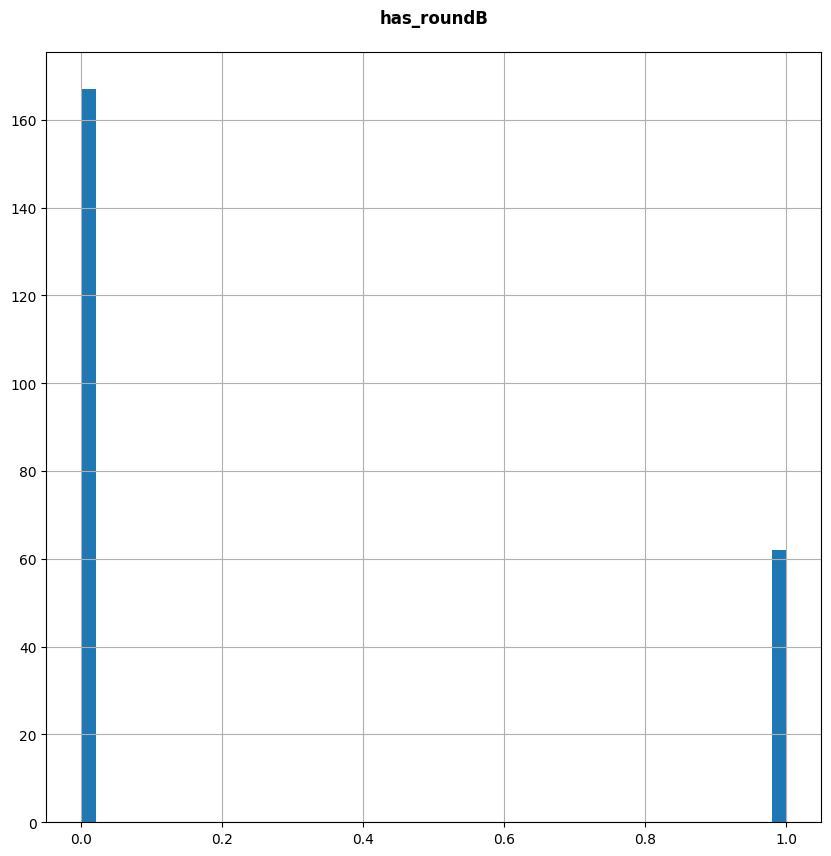

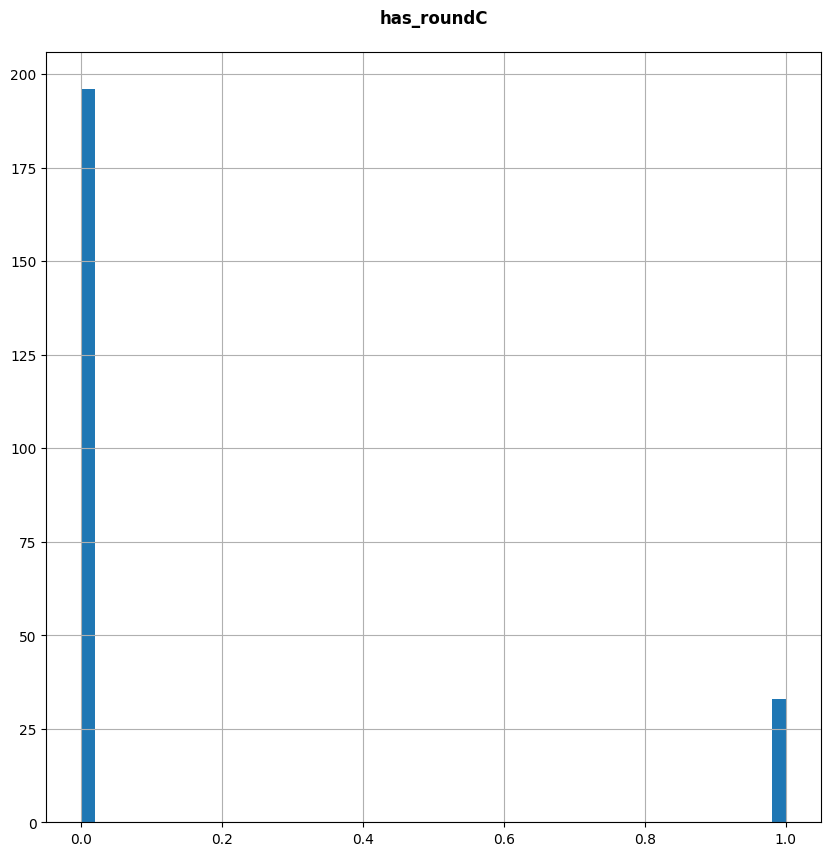

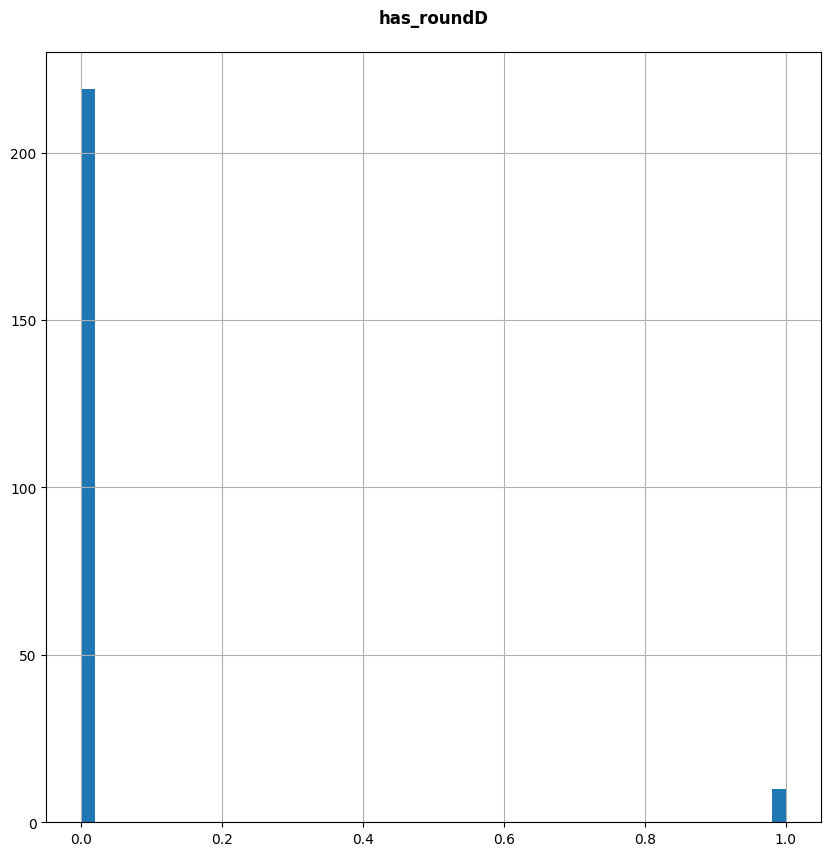

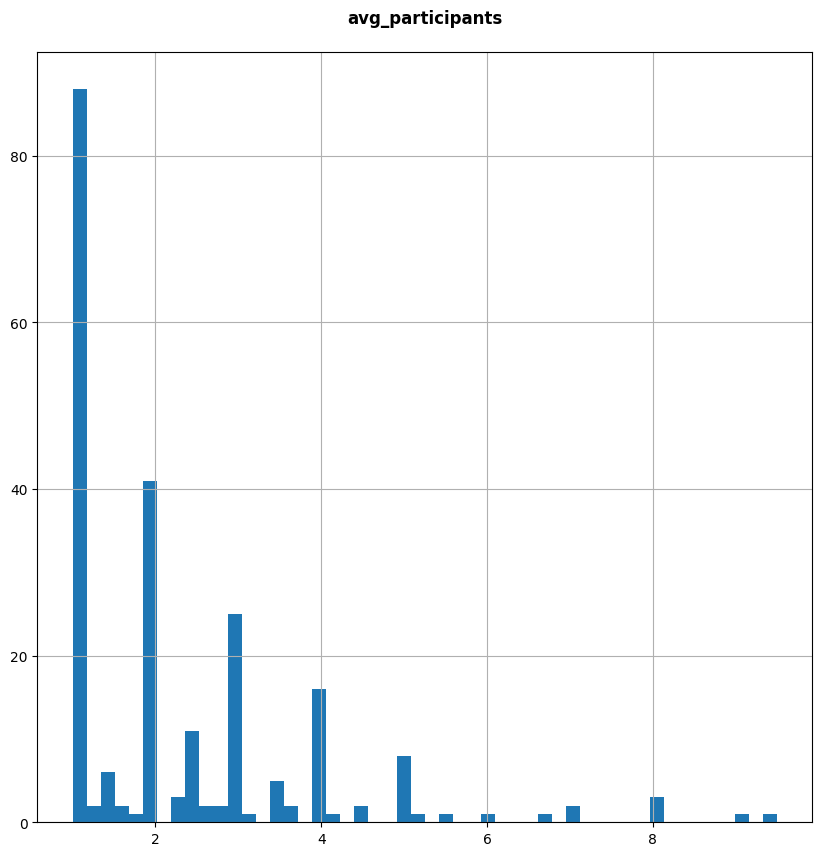

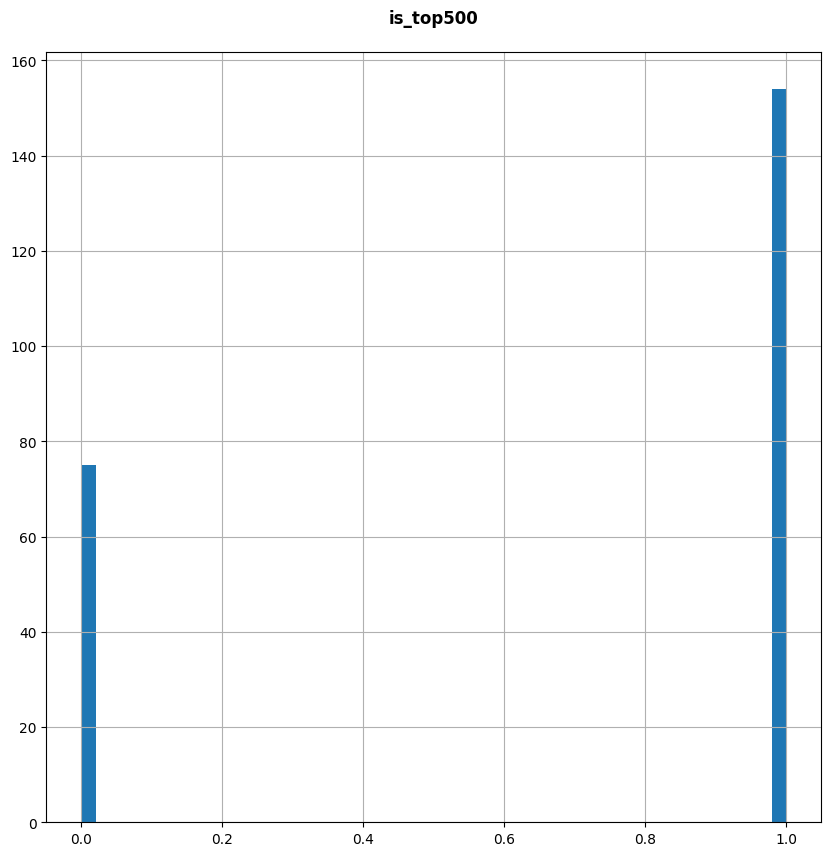

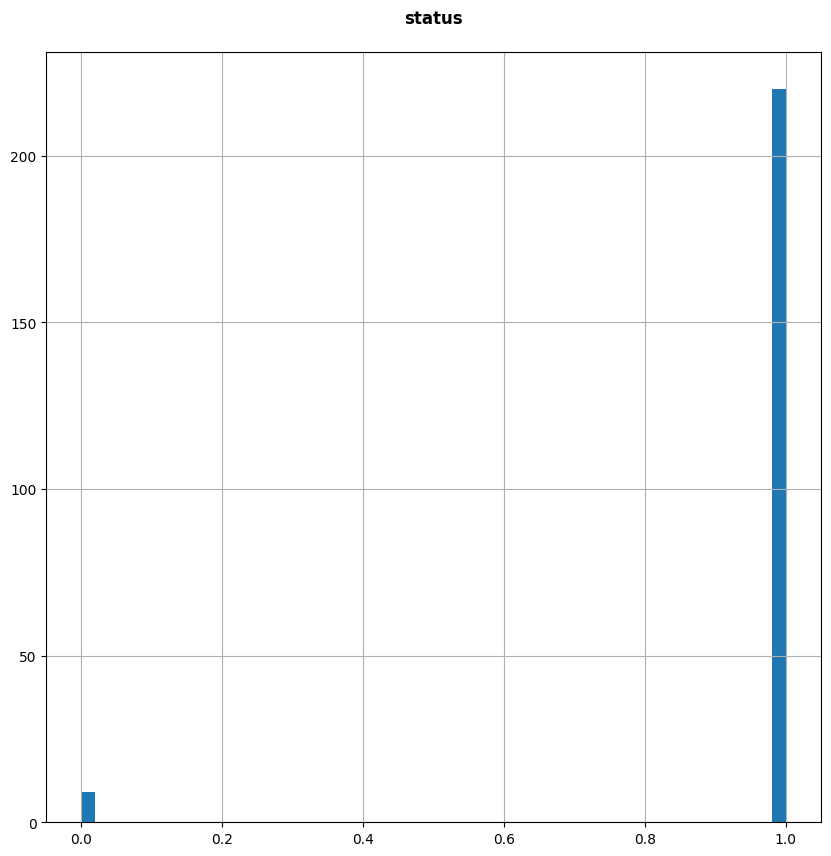

In [57]:
# Distribution in attributes
%matplotlib inline
for i in df.columns:
    df[i].hist(bins=50, figsize=(10,10))
    plt.title(i+"\n",fontweight ="bold")
    plt.show()
    print("   =======================================================================================================\n")


### Histogram Insight: -

Histogram helps in identifying the following:
- View the shape of your data set’s distribution to look for outliers or other significant data points.

- Determine whether something significant has boccurred from one time period to another.

### From the above histogram we observe that the company success status is highly related to labels.

### Why Histogram? 

It is used to illustrate the major features of the distribution of the data in a convenient form. It is also useful when dealing with large data sets (greater than 100 observations). It can help detect any unusual observations (outliers) or any gaps in the data.

From the above graphical representation we can identify that the highest bar represents the outliers which is above the maximum range.

We can also identify that the values are moving on the right side, which determines positive and the centered values determines normal skewness.

# 2. Distplot

A Distplot or distribution plot, depicts the variation in the data distribution. Seaborn Distplot represents the overall distribution of continuous data variables. The Seaborn module along with the Matplotlib module is used to depict the distplot with different variations in it 

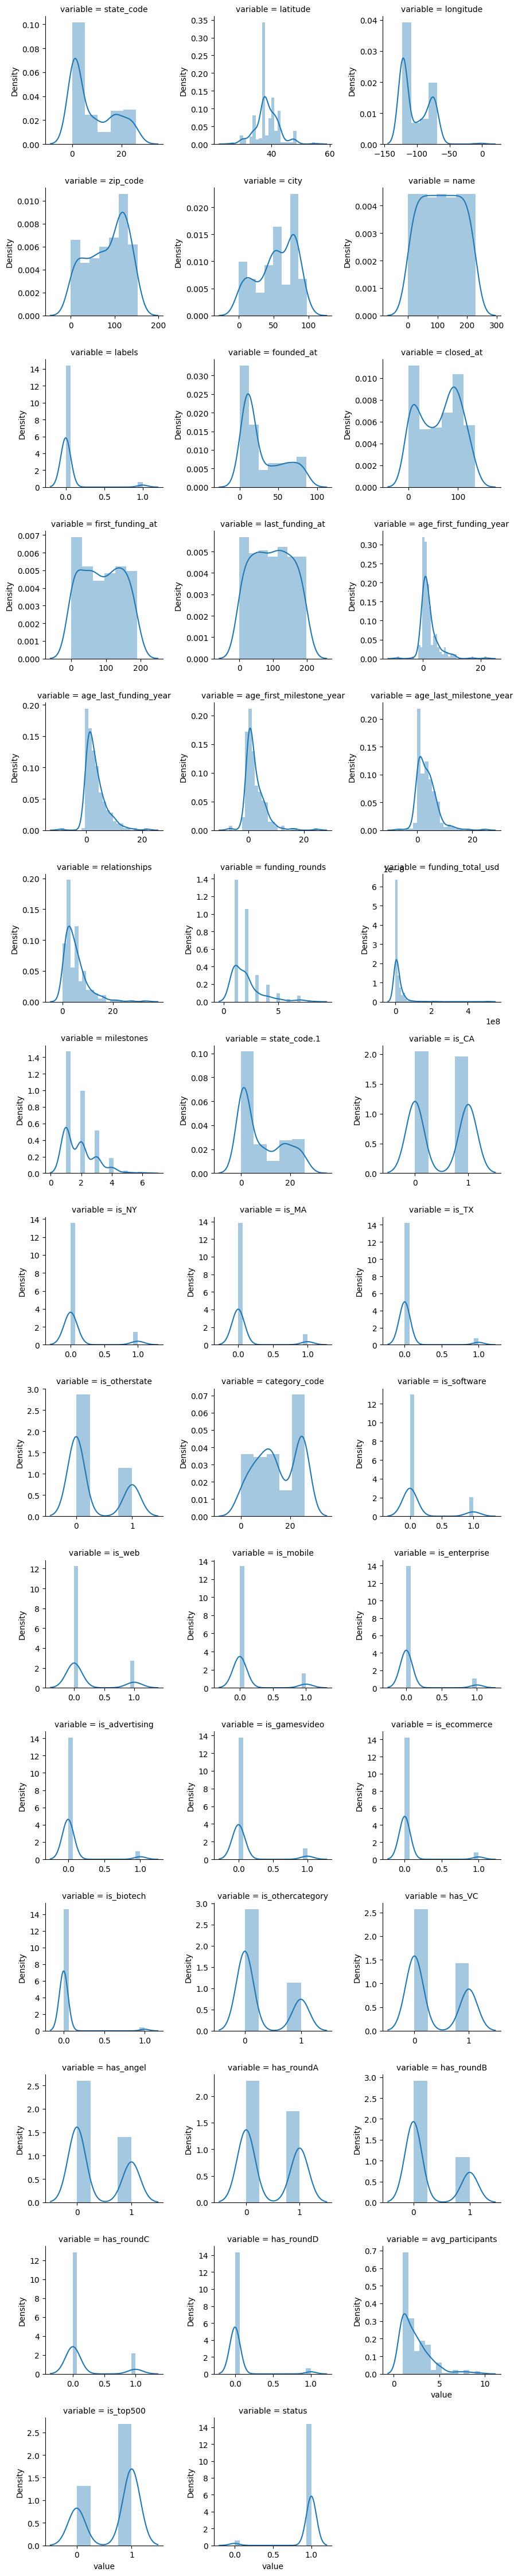

In [58]:
num = [f for f in df.columns if df.dtypes[f] != 'object']
nd = pd.melt(df, value_vars = num)
n1 = sns.FacetGrid (nd, col='variable', col_wrap=3, sharex=False, sharey = False)
n1 = n1.map(sns.distplot, 'value')
n1

### Distplot Insights: -

Above is the distrution bar graphs to confirm about the statistics of the data about the skewness, the above results are:
1. 37 columns are positive skewed, 6 columns are negative skewed and 1 columns are normal skewed
2. 1 column is added here i.e status which is our target variable ~ which is also -ve skewed. In that case we'll need to log transform this variable so that it becomes normally distributed. A normally distributed (or close to normal) target variable helps in better modeling the relationship between target and independent variables

### Why Distplot?
Skewness is demonstrated on a bell curve when data points are not distributed symmetrically to the left and right sides of the median on a bell curve. If the bell curve is shifted to the left or the right, it is said to be skewed.

We can observe that the bell curve is shifted to left we indicates positive skewness.As all the column are positively skewed we don't need to do scaling.

Let's proceed and check the distribution of the target variable.


In [1605]:
#+ve skewed 
df['status'].skew()

-4.77319489693332

#### The target variable is negatively skewed.A normally distributed (or close to normal) target variable helps in better modeling the relationship between target and independent variables. 

# 3. Heatmap




A heatmap (or heat map) is a graphical representation of data where values are depicted by color.Heatmaps make it easy to visualize complex data and understand it at a glance 

__Correlation__ - A positive correlation is a relationship between two variables in which both variables move in the same direction. Therefore, when one variable increases as the other variable increases, or one variable decreases while the other decreases.

Correlation can have a value:

- 1 is a perfect positive correlation
- 0 is no correlation (the values don't seem linked at all)
- -1 is a perfect negative correlation



(44.5, -0.5)

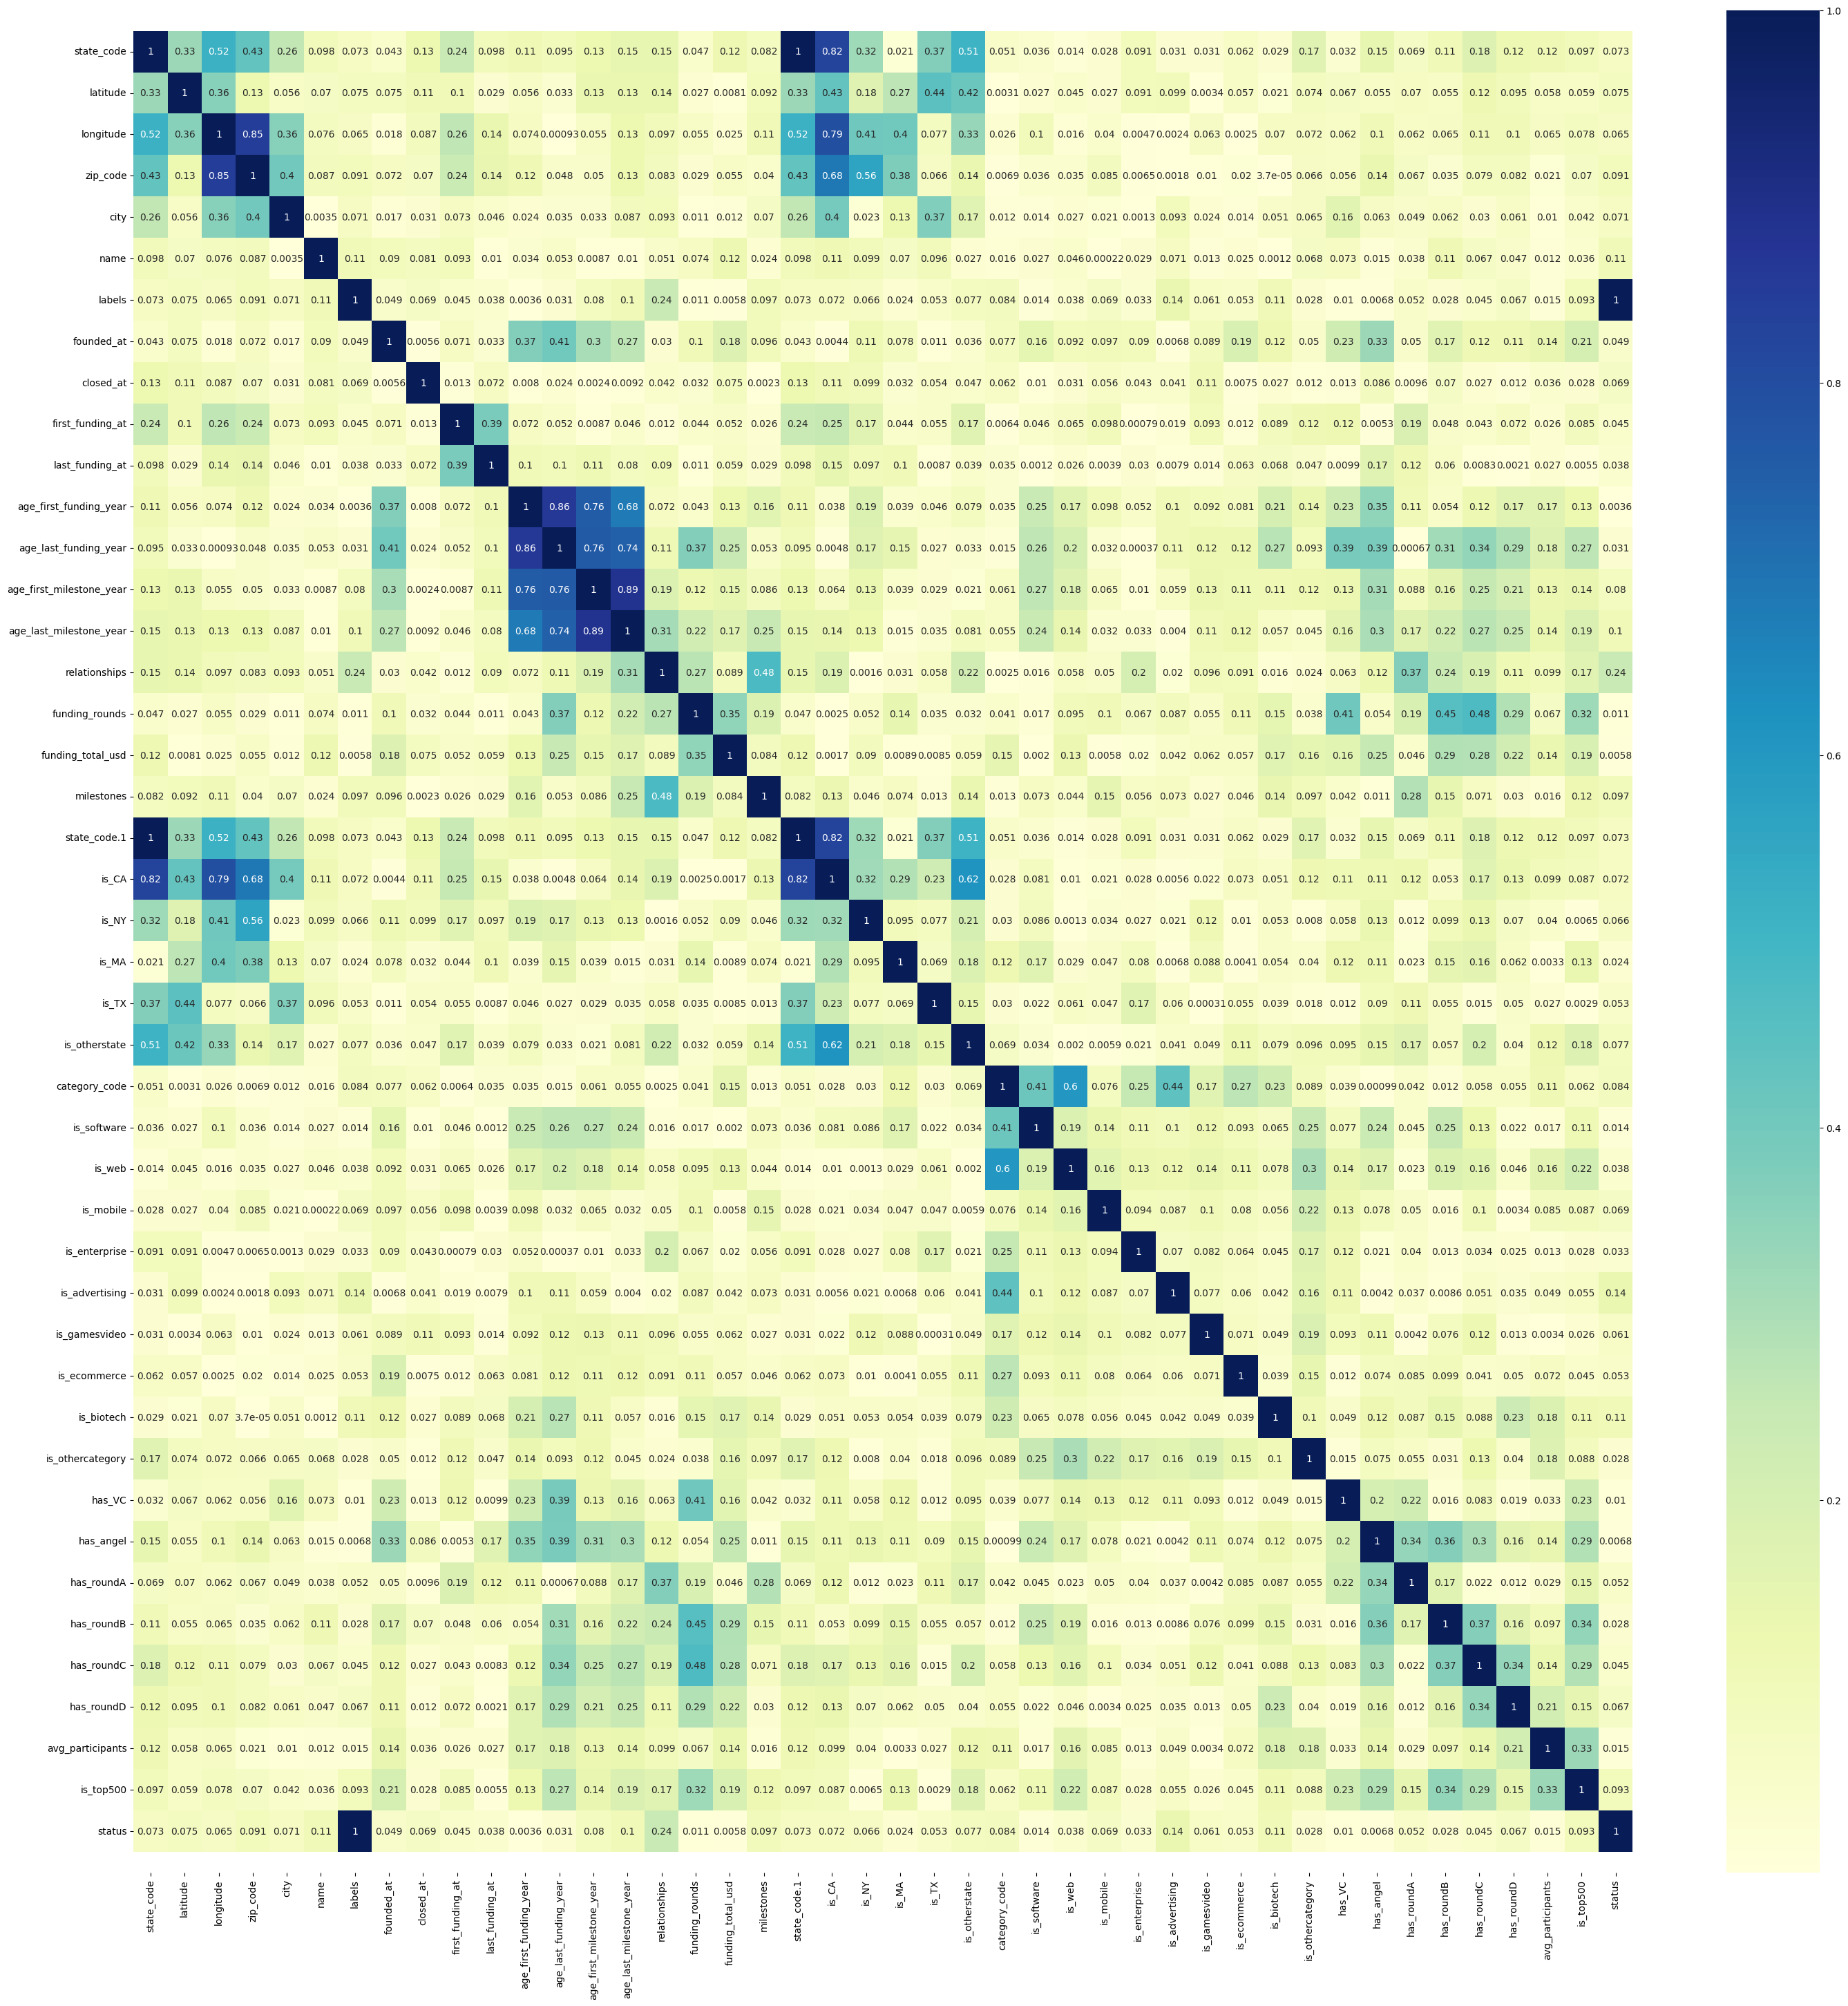

In [85]:
#correlation plot
plt.figure(figsize=(35,35))
ax = sns.heatmap(data = df.corr().abs(),cmap='YlGnBu',annot=True)

bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5,top - 0.5)

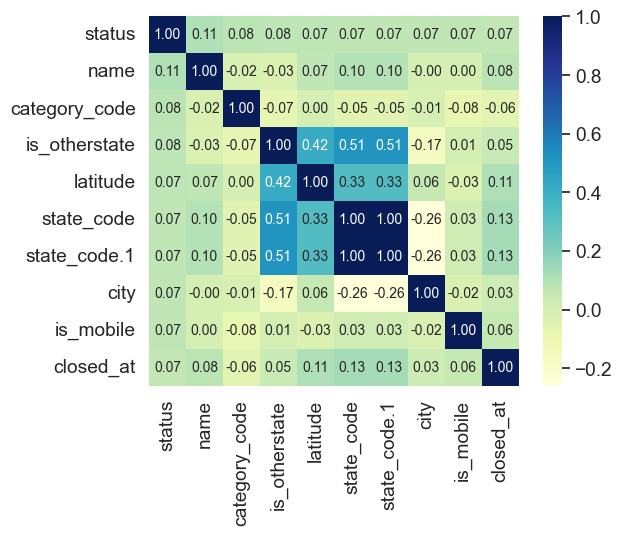

In [87]:
cols = df.corr().nlargest(10,'status')['status'].index
cm = np.corrcoef(df[cols].values.T) 
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, cmap='YlGnBu', fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

### Notice the last column from right side of this map. We can see the correlation of all variables against status. As you can see, some variables seem to be strongly correlated with the target variable. Here, a numeric correlation score will help us understand the graph better.

In [1607]:
print (corr['status'].sort_values(ascending=False)[:15], '\n') #top 15 values
print ('-------------------------------------')
print (corr['status'].sort_values(ascending=False)[-5:]) #last 5 values
print ('-------------------------------------')

status                      1.000000
labels                      1.000000
relationships               0.244425
is_advertising              0.135995
is_biotech                  0.107517
name                        0.105387
age_last_milestone_year     0.103604
milestones                  0.096847
is_top500                   0.093263
zip_code                    0.090825
category_code               0.083656
age_first_milestone_year    0.080406
is_otherstate               0.077489
latitude                    0.074696
state_code.1                0.072636
Name: status, dtype: float64 

-------------------------------------
funding_rounds            0.010542
has_VC                    0.010439
has_angel                 0.006793
funding_total_usd         0.005819
age_first_funding_year    0.003604
Name: status, dtype: float64
-------------------------------------


Here we see that the labels feature is 100% correlated with the target variable.

In [1608]:
corr

state_code  latitude  longitude  zip_code      city  \
state_code                  1.000000  0.325836   0.517379  0.430331  0.261010   
latitude                    0.325836  1.000000   0.359412  0.125125  0.055573   
longitude                   0.517379  0.359412   1.000000  0.847199  0.362203   
zip_code                    0.430331  0.125125   0.847199  1.000000  0.400424   
city                        0.261010  0.055573   0.362203  0.400424  1.000000   
name                        0.098277  0.069975   0.076494  0.087268  0.003514   
labels                      0.072636  0.074696   0.065387  0.090825  0.071036   
founded_at                  0.042769  0.074731   0.018193  0.072408  0.016712   
closed_at                   0.128660  0.108788   0.086991  0.069847  0.030851   
first_funding_at            0.242246  0.103925   0.261775  0.237125  0.072901   
last_funding_at             0.098457  0.028928   0.135983  0.142279  0.045702   
age_first_funding_year      0.113812  0.055700   0.074137  0.115303  0.023511   
age_last_funding_year       0.094691  0.033264   0.000932  0.048349  0.034944   
age_first_milestone_year    0.127575  0.134529   0.054895  0.049903  0.032557   
age_last_milestone_year     0.145133  0.134473   0.127717  0.125166  0.086713   
relationships               0.145848  0.140568   0.096500  0.082689  0.093014   
funding_rounds              0.046907  0.027290   0.054743  0.029090  0.010625   
funding_total_usd           0.120462  0.008060   0.024797  0.054959  0.012216   
milestones                  0.081769  0.091929   0.106186  0.039638  0.070231   
state_code.1                1.000000  0.325836   0.517379  0.430331  0.261010   
is_CA                       0.824457  0.427696   0.794268  0.684562  0.396682   
is_NY                       0.322644  0.175702   0.409635  0.559313  0.022805   
is_MA                       0.021472  0.269438   0.402550  0.376431  0.125735   
is_TX                       0.367387  0.443619   0.076527  0.065795  0.372029   
is_otherstate               0.508817  0.417786   0.334779  0.136210  0.165981   
category_code               0.051412  0.003131   0.025990  0.006942  0.011866   
is_software                 0.036397  0.026517   0.101286  0.036293  0.014268   
is_web                      0.014164  0.045082   0.015680  0.035491  0.026638   
is_mobile                   0.028419  0.027439   0.040082  0.084647  0.020711   
is_enterprise               0.090770  0.091240   0.004726  0.006535  0.001338   
is_advertising              0.031284  0.098720   0.002365  0.001832  0.093039   
is_gamesvideo               0.031178  0.003351   0.062628  0.010151  0.023517   
is_ecommerce                0.062172  0.056975   0.002466  0.020081  0.013517   
is_biotech                  0.028642  0.020563   0.070370  0.000037  0.051089   
is_othercategory            0.166685  0.074440   0.072096  0.066062  0.065335   
has_VC                      0.031958  0.067426   0.061866  0.056357  0.160740   
has_angel                   0.145124  0.055373   0.103782  0.139829  0.063113   
has_roundA                  0.068823  0.070470   0.062120  0.067191  0.048615   
has_roundB                  0.109397  0.054905   0.064642  0.035160  0.061885   
has_roundC                  0.183432  0.118587   0.106551  0.079191  0.029530   
has_roundD                  0.121333  0.094796   0.103788  0.081767  0.060822   
avg_participants            0.115470  0.058068   0.065488  0.021355  0.010257   
is_top500                   0.097124  0.059281   0.078367  0.070031  0.042022   
status                      0.072636  0.074696   0.065387  0.090825  0.071036   

                              name    labels  founded_at  closed_at  \
state_code                0.098277  0.072636    0.042769   0.128660   
latitude                  0.069975  0.074696    0.074731   0.108788   
longitude                 0.076494  0.065387    0.018193   0.086991   
zip_code                  0.087268  0.090825    0.072408   0.069847   
city                     

### Heatmap insights: -

As we know, it is recommended to avoid correlated features in your dataset. Indeed, a group of highly correlated features will not bring additional information (or just very few), but will increase the complexity of the algorithm, hence increasing the risk of errors.




### Why Heatmap?

Heatmaps are used to show relationships between two variables, one plotted on each axis. By observing how cell colors change across each axis, you can observe if there are any patterns in value for one or both variables.

In [1609]:
# Create correlation matrix
corr_matrix = df.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool_))

# Find index of feature columns with correlation greater than 0.8
to_drop = [column for column in upper.columns if any(upper[column] > 0.2)]

In [1610]:
to_drop

['latitude',
 'longitude',
 'zip_code',
 'city',
 'first_funding_at',
 'last_funding_at',
 'age_first_funding_year',
 'age_last_funding_year',
 'age_first_milestone_year',
 'age_last_milestone_year',
 'relationships',
 'funding_rounds',
 'funding_total_usd',
 'milestones',
 'state_code.1',
 'is_CA',
 'is_NY',
 'is_MA',
 'is_TX',
 'is_otherstate',
 'is_software',
 'is_web',
 'is_enterprise',
 'is_advertising',
 'is_ecommerce',
 'is_biotech',
 'is_othercategory',
 'has_VC',
 'has_angel',
 'has_roundA',
 'has_roundB',
 'has_roundC',
 'has_roundD',
 'avg_participants',
 'is_top500',
 'status']

In [1611]:
#Here we are droping those columns
to_drop.remove('status')
df.drop(columns = to_drop, axis=1, inplace=True)

In [1612]:
df.head()

state_code  name  labels  founded_at  closed_at  category_code  is_mobile  \
4            1    90       0          73         18             10          0   
5            1   114       0           7         52             14          0   
11           1    27       0          11         40             26          0   
16           1   159       0           8        130             21          0   
19           1    16       0          12        127              7          0   

    is_gamesvideo  status  
4               1       1  
5               0       1  
11              0       1  
16              0       1  
19              0       1

In [1613]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 229 entries, 4 to 920
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   state_code     229 non-null    int32
 1   name           229 non-null    int32
 2   labels         229 non-null    int64
 3   founded_at     229 non-null    int32
 4   closed_at      229 non-null    int32
 5   category_code  229 non-null    int32
 6   is_mobile      229 non-null    int64
 7   is_gamesvideo  229 non-null    int64
 8   status         229 non-null    int32
dtypes: int32(6), int64(3)
memory usage: 12.5 KB


Here, we are checking which columns we have after "to-drop".

# 4. Boxplot

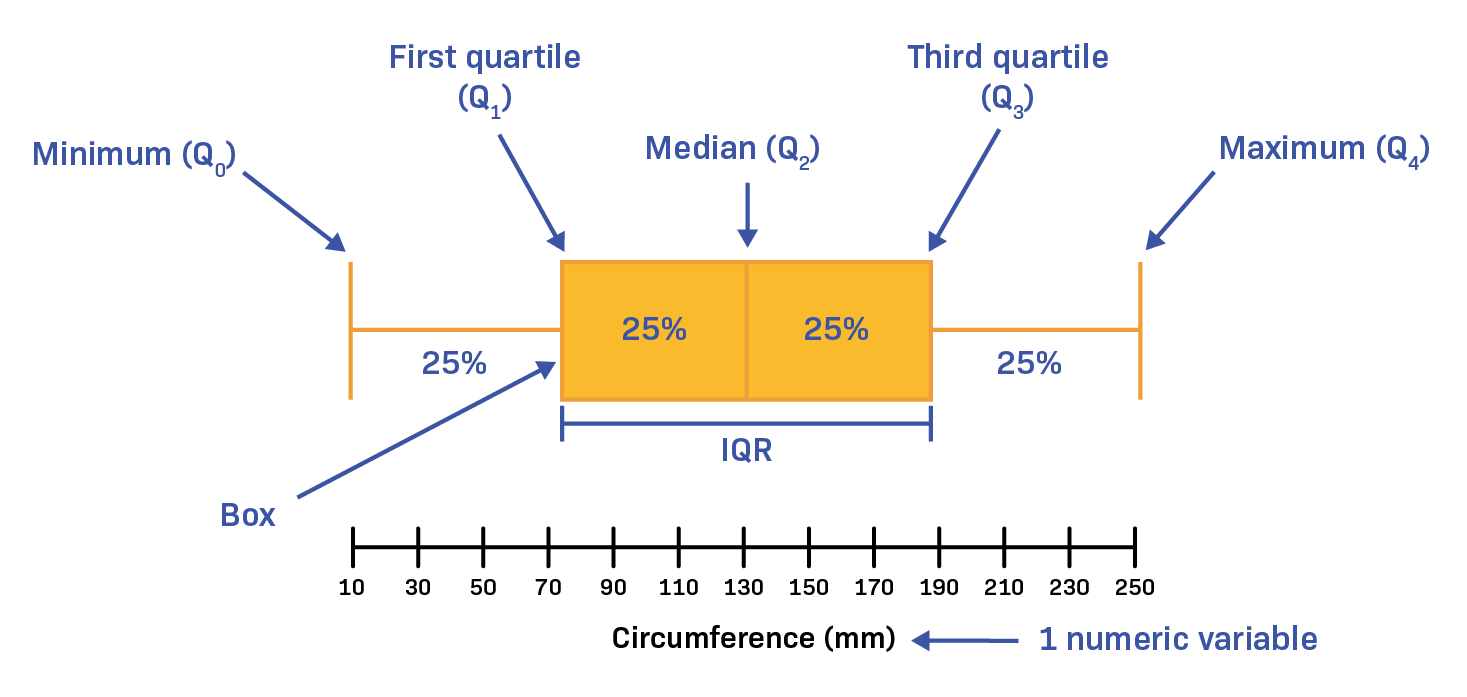

A boxplot is a standardized way of displaying the distribution of data based on a five number summary (“minimum”, first quartile [Q1], median, third quartile [Q3] and “maximum”).

Basically, to find the outlier in a dataset/column.

In [1614]:
features = df.columns.tolist()
features.remove('status')

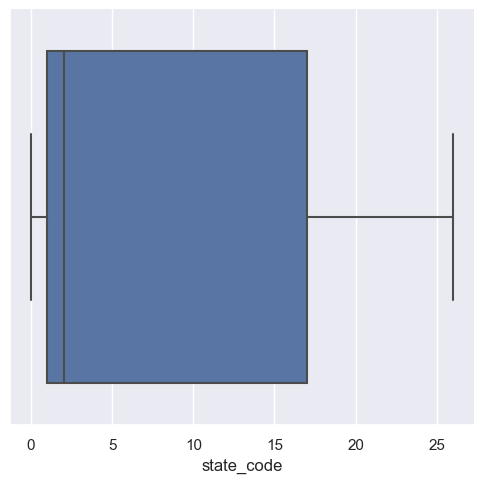

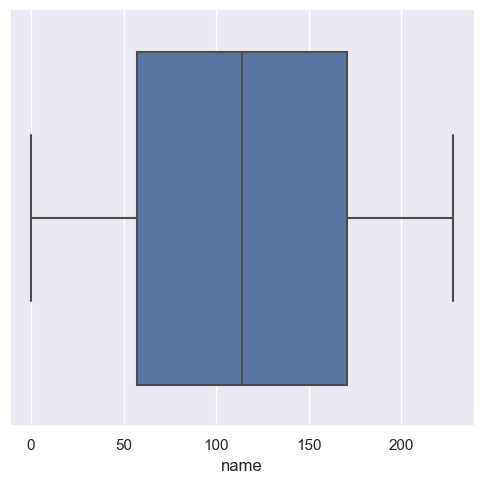

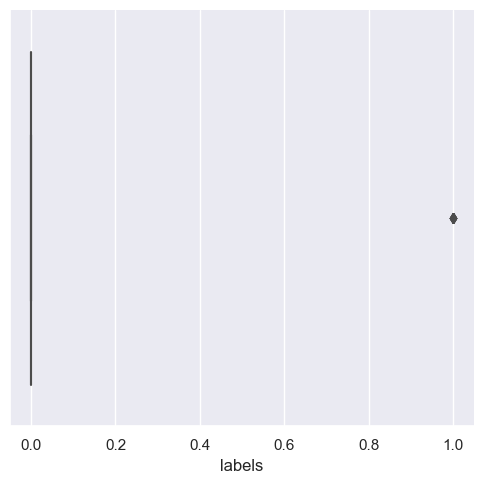

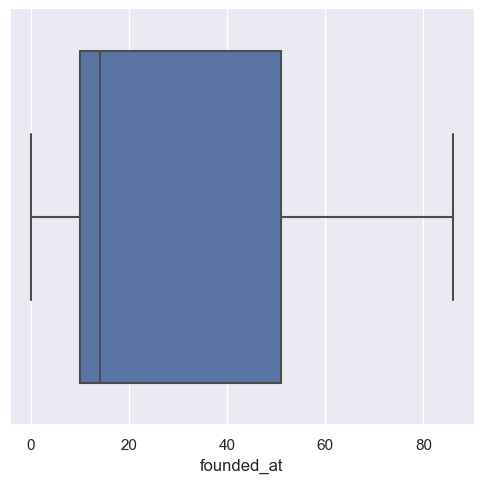

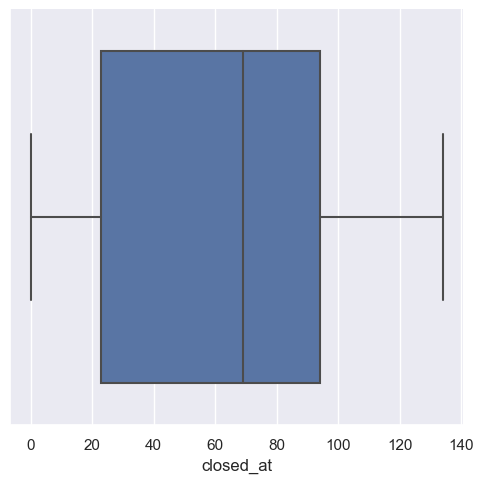

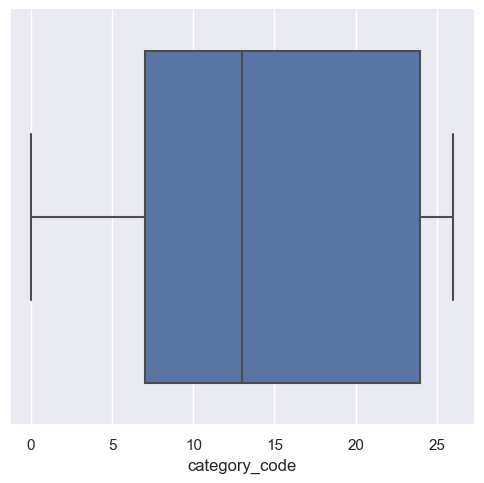

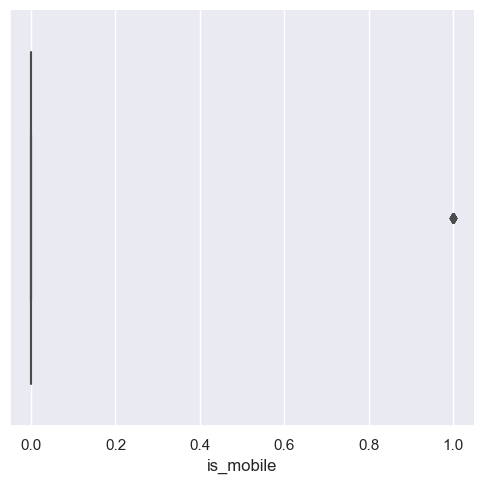

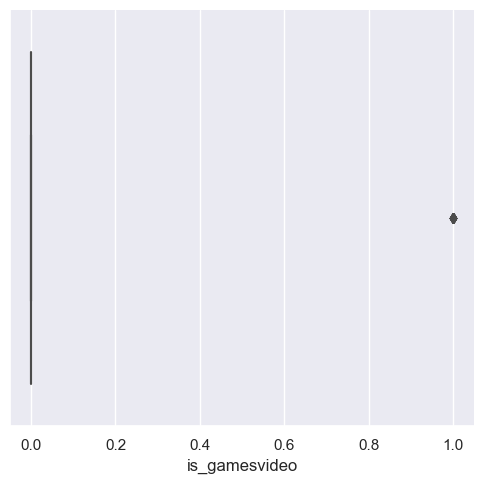

In [1615]:
for value in features:
    sns.catplot(data=df, x=value,  kind="box")

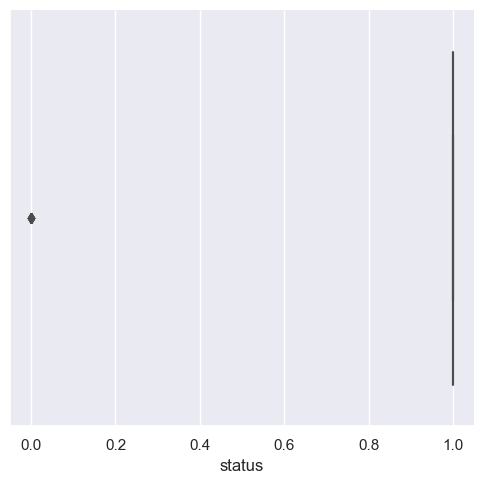

In [1616]:
#for target variable
sns.catplot(data=df, x='status', kind='box')

#### The dark points are known as Outliers. Outliers are those data points that are significantly different from the rest of the dataset. They are often abnormal observations that skew the data distribution, and arise due to inconsistent data entry, or erroneous observations.

### Boxplot Insights: - 
- Sometimes outliers may be an error in the data and should be removed. In this case these points are correct readings yet they are different from the other points that they appear to be incorrect.

- The best way to decide wether to remove them or not is to train models with and without these data points and compare their validation accuracy.

- So we will keep it unchanged as it won't affect our model.

Here, we can see that most of the variables possess outlier values. It would take us days if we start treating these outlier values one by one. Hence, for now we'll leave them as is and let our algorithm deal with them. As we know, tree-based algorithms are usually robust to outliers.

### Why Boxplot?
Box plots are used to show distributions of numeric data values, especially when you want to compare them between multiple groups. They are built to provide high-level information at a glance, offering general information about a group of data's symmetry, skew, variance, and outliers.



In the next step we will divide our cleaned data into training data and testing data.

# 5. Barplots

In [82]:
import plotly.graph_objs as go
import plotly.offline as py

def mean_bar_plot(feature_dataframe):
    features = feature_dataframe.columns.tolist()
    features.remove('status')
    for i in features:
        y = feature_dataframe['status'].values
    #     x = feature_dataframe.drop(['status'],axis=1).values
        x = feature_dataframe[i].values
        data = [go.Bar(
                    x= x,
                     y= y,
                    width = 0.5,
                    marker=dict(
                       color = feature_dataframe['status'].values,
                    colorscale='Portland',
                    showscale=True,
                    reversescale = False
                    ),
                    opacity=0.6
                )]

        layout= go.Layout(
            autosize= True,
            title= 'Barplots of '+i+' Feature Importance',
            hovermode= 'closest',
            yaxis=dict(
                title= 'Feature Importance',
                ticklen= 15,
                gridwidth= 15
            ),
            showlegend= False
        )
        fig = go.Figure(data=data, layout=layout)
        py.iplot(fig, filename='bar-direct-labels')
    
mean_bar_plot(df)

# Step 2: Data Preparation
**Goal:-**

Tasks we are going to in this step:

1. Now we will spearate the target variable and feature columns in two different dataframe and will check the shape of the dataset for validation purpose.
2. Split dataset into train and test dataset.
3. Scaling on train dataset.

**1. Now we spearate the target variable and feature columns in two different dataframe and will check the shape of the dataset for validation purpose.**

In [1617]:
# Separate target and feature column in X and y variable

target = 'status'

# X will be the features
X = df.drop(target,axis=1) 
#y will be the target variable
y = df[target]

y have target variable and X have all other variable.

#### Here in Startup Success Rate Prediction, status is the target variable.

In [1618]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 229 entries, 4 to 920
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   state_code     229 non-null    int32
 1   name           229 non-null    int32
 2   labels         229 non-null    int64
 3   founded_at     229 non-null    int32
 4   closed_at      229 non-null    int32
 5   category_code  229 non-null    int32
 6   is_mobile      229 non-null    int64
 7   is_gamesvideo  229 non-null    int64
dtypes: int32(5), int64(3)
memory usage: 11.6 KB


In [1619]:
y

4      1
5      1
11     1
16     1
19     1
      ..
911    1
913    1
915    1
919    1
920    1
Name: status, Length: 229, dtype: int32

In [1620]:
# Check the shape of X and y variable
X.shape, y.shape

((229, 8), (229,))

In [1621]:
# Reshape the y variable 
y = y.values.reshape(-1,1)

In [1622]:
# Again check the shape of X and y variable
X.shape, y.shape

((229, 8), (229, 1))

#### 2. Spliting the dataset in training and testing data. 

*Here we are spliting our dataset into 80/20 percentage where 80% dataset goes into the training part and 20% goes into testing  part.*

In [1623]:
# Split the X and y into X_train, X_test, y_train, y_test variables with 80-20% split.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [1624]:
# Check shape of the splitted variables
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((183, 8), (46, 8), (183, 1), (46, 1))

### Insights: -

Train test split technique is used to estimate the performance of machine learning algorithms which are used to make predictions on data not used to train the model.It is a fast and easy procedure to perform, the results of which allow you to compare the performance of machine learning algorithms for your predictive modeling problem. Although simple to use and interpret, there are times when the procedure should not be used, such as when you have a small dataset and situations where additional configuration is required, such as when it is used for classification and the dataset is not balanced.

In the next step we will train our model on the basis of our training and testing data.

# Step 3: Model Training

#### Goal:
In this step we are going to train our dataset on different classification algorithms. As we know that our target variable is in discrete format so we have to apply classification algorithm. Target variable is a category like filtering.In our dataset we have the outcome variable or Dependent variable i.e Y having only two set of values, either M (Malign) or B(Benign). So we will use Classification algorithm**

__Algorithms we are going to use in this step__

1. Logistic Regression
2. KNearest Neighbor
3. Random Forest Classification

K-fold cross validation is a procedure used to estimate the skill of the model on new data. There are common tactics that you can use to select the value of k for your dataset. There are commonly used variations on cross-validation, such as stratified and repeated, that are available in scikit-learn

In [1625]:
# Define kfold with 10 split
cv = KFold(n_splits=10, shuffle=True, random_state=42)

The goal of cross-validation is to test the model's ability to predict new data that was not used in estimating it, in order to flag problems like overfitting or selection bias and to give an insight on how the model will generalize to an independent dataset (i.e., an unknown dataset, for instance from a real problem).

# 1. Logistic Regression

Logistic regression is one of the most popular Machine Learning algorithms, which comes under the Supervised Learning technique. It is used for predicting the categorical dependent variable using a given set of independent variables.

Logistic regression predicts the output of a categorical dependent variable. Therefore the outcome must be a categorical or discrete value. It can be either Yes or No, 0 or 1, true or False, etc. but instead of giving the exact value as 0 and 1, it gives the probabilistic values which lie between 0 and 1.

#### Train set cross-validation 

In [1626]:
#Using Logistic Regression Algorithm to the Training Set
from sklearn.linear_model import LogisticRegression

log_R = LogisticRegression() #Object Creation

log_R.fit(X_train, y_train)

LogisticRegression()

In [1627]:
#Accuracy check of trainig data

#Get R2 score
log_R.score(X_train, y_train)


0.9781420765027322

In [1628]:
#Accuracy of test data
log_R.score(X_test, y_test) 

0.9565217391304348

In [1629]:
# Getting kfold values
lg_scores = -1 * cross_val_score(log_R, 
                                 X_train, 
                                 y_train, 
                                 cv=cv, 
                                 scoring='neg_root_mean_squared_error')
lg_scores

array([0.22941573, 0.        , 0.22941573, 0.23570226, 0.        ,
       0.        , 0.23570226, 0.        , 0.33333333, 0.23570226])

In [1630]:
# Mean of the train kfold scores
lg_score_train = np.mean(lg_scores)
lg_score_train

0.14992715822610042

### Prediction 

Now we will perform prediction on the dataset using Logistic Regression.

In [1631]:
# Predict the values on X_test_scaled dataset 
y_predicted = log_R.predict(X_test)

## Various parameters are calculated for analysing the predictions.

1) Confusion Matrix
2)Classification Report
3)Accuracy Score
4)Precision Score
5)Recall Score
6)F1 Score

## Confusion Matrix

A confusion matrix presents a table layout of the different outcomes of the prediction and results of a classification problem and helps visualize its outcomes. It plots a table of all the predicted and actual values of a classifier.

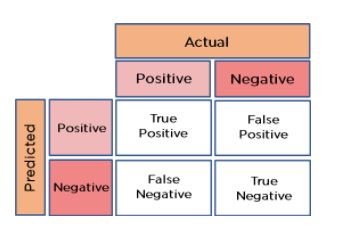

#### This diagram helps in understanding the concept of confusion matrix. 

In [1632]:
# Constructing the confusion matrix.
from sklearn.metrics import confusion_matrix

In [1633]:
#confusion matrix btw y_test and y_predicted
cm = confusion_matrix(y_test,y_predicted)

Text(29.75, 0.5, 'True Class')

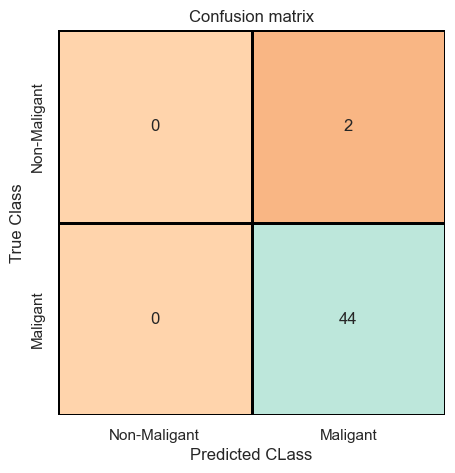

In [1634]:
#We are creating Confusion Matrix on heatmap to have better understanding 
# sns.heatmap(cm,cmap = 'Red') ~ to check for available colors
sns.set(rc = {'figure.figsize':(5,5)})
sns.heatmap(cm,cmap = 'icefire_r', annot = True, cbar=False, linecolor='Black', linewidth = 2)

plt.title("Confusion matrix")
plt.xticks(np.arange(2)+.5,['Non-Maligant', 'Maligant'])
plt.yticks(np.arange(2)+.5,['Non-Maligant', 'Maligant'])
plt.xlabel('Predicted CLass')
plt.ylabel('True Class')


<AxesSubplot:>

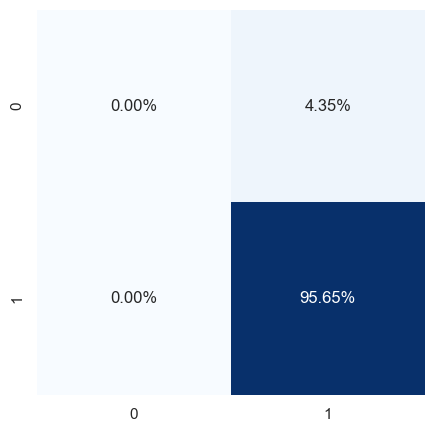

In [1635]:
sns.heatmap(cm/np.sum(cm), annot=True, 
            fmt='.2%', cmap='Blues', cbar = False)

## Evaluating all kinds of evaluating parameters. 

#### Classification Report :
A classification report is a performance evaluation metric in machine learning. It is used to show the precision, recall, F1 Score, and support of your trained classification model. 

#### F1_score :
The F1 score is a machine learning metric that can be used in classification models. 

#### Precision_score :
The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier not to label as positive a sample that is negative. The best value is 1 and the worst value is 0.

#### Recall_score :
Recall score is used to measure the model performance in terms of measuring the count of true positives in a correct manner out of all the actual positive values. Precision-Recall score is a useful measure of success of prediction when the classes are very imbalanced.

In [1636]:
# Evaluating the classifier
# printing every score of the classifier
# scoring in anything
from sklearn.metrics import classification_report 
from sklearn.metrics import f1_score, accuracy_score, precision_score,recall_score
from sklearn.metrics import confusion_matrix
  

print("The model used is Logistic Regression")
  
l_acc = accuracy_score(y_test, y_predicted)*100
print("\nThe accuracy is: {}".format(l_acc))
  
prec = precision_score(y_test, y_predicted)
print("The precision is: {}".format(prec))
  
rec = recall_score(y_test, y_predicted)
print("The recall is: {}".format(rec))
  
f1 = f1_score(y_test, y_predicted)
print("The F1-Score is: {}".format(f1))
  
c1 = classification_report(y_test, y_predicted)
print("Classification Report is:")
print()
print(c1)

The model used is Logistic Regression

The accuracy is: 95.65217391304348
The precision is: 0.9565217391304348
The recall is: 1.0
The F1-Score is: 0.9777777777777777
Classification Report is:

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.96      1.00      0.98        44

    accuracy                           0.96        46
   macro avg       0.48      0.50      0.49        46
weighted avg       0.91      0.96      0.94        46



# 2. K Nearest Neighbour

K-Nearest Neighbour is one of the simplest Machine Learning algorithms based on Supervised Learning technique.
K-NN algorithm assumes the similarity between the new case/data and available cases and put the new case into the category that is most similar to the available categories.
K-NN algorithm stores all the available data and classifies a new data point based on the similarity. This means when new data appears then it can be easily classified into a well suite category by using K- NN algorithm

In [1637]:
#Using KNeighborsClassifier Method of neighbors class to use Nearest Neighbor algorithm
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier()
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [1638]:
#Accuracy check of trainig data
#Get R2 score
classifier.score(X_train, y_train)

0.9617486338797814

In [1639]:
#Accuracy of test data
classifier.score(X_test, y_test) 

0.9565217391304348

In [1640]:
#Get kfold values
Nn_scores = -1 * cross_val_score(classifier, 
                                    X_train, 
                                    y_train, 
                                    cv=cv, 
                                    scoring='neg_root_mean_squared_error')
Nn_scores


array([0.22941573, 0.        , 0.22941573, 0.23570226, 0.        ,
       0.        , 0.23570226, 0.        , 0.33333333, 0.23570226])

In [1641]:
# Mean of the train kfold scores
Nn_score_train = np.mean(Nn_scores)
Nn_score_train

0.14992715822610042

### Prediction

Now we will perform prediction on the dataset using K Nearest Neighbour.

In [1642]:
# Predict the values on X_test_scaled dataset 
y_predicted = classifier.predict(X_test)

In [1643]:
# Constructing the confusion matrix.
from sklearn.metrics import confusion_matrix

In [1644]:
#Confusion matrix btw y_test and y_predicted
cm = confusion_matrix(y_test,y_predicted)

Text(29.75, 0.5, 'True Class')

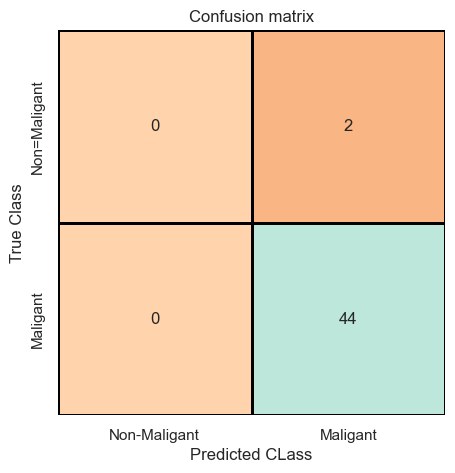

In [1645]:
#We are drawing cm on heatmap to have better understanding 
# sns.heatmap(cm,cmap = 'Red') ~ to check for available colors
sns.heatmap(cm,cmap = 'icefire_r', annot = True, fmt= 'd', cbar=False, linecolor='Black', linewidth = 2)
plt.title("Confusion matrix")
plt.xticks(np.arange(2)+.5,['Non-Maligant', 'Maligant'])
plt.yticks(np.arange(2)+.5,['Non=Maligant', 'Maligant'])
plt.xlabel('Predicted CLass')
plt.ylabel('True Class')

<AxesSubplot:>

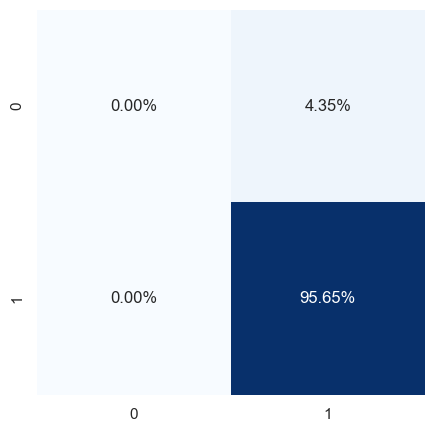

In [1646]:
sns.heatmap(cm/np.sum(cm), annot=True, 
            fmt='.2%', cmap='Blues', cbar = False)

### Evaluating all kinds of evaluating parameters. 

In [1647]:
# Evaluating the classifier
# printing every score of the classifier
# scoring in anything
from sklearn.metrics import classification_report 
from sklearn.metrics import f1_score, accuracy_score, precision_score,recall_score
from sklearn.metrics import confusion_matrix
  

print("The model used is KNeighbors Classifier")
  
k_acc = accuracy_score(y_test, y_predicted)*100
print("\nThe accuracy is: {}".format(k_acc))
  
prec = precision_score(y_test, y_predicted)
print("The precision is: {}".format(prec))
  
rec = recall_score(y_test, y_predicted)
print("The recall is: {}".format(rec))
  
f1 = f1_score(y_test, y_predicted)
print("The F1-Score is: {}".format(f1))
  
c1 = classification_report(y_test, y_predicted)
print("Classification Report is:")
print()
print(c1)    

The model used is KNeighbors Classifier

The accuracy is: 95.65217391304348
The precision is: 0.9565217391304348
The recall is: 1.0
The F1-Score is: 0.9777777777777777
Classification Report is:

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.96      1.00      0.98        44

    accuracy                           0.96        46
   macro avg       0.48      0.50      0.49        46
weighted avg       0.91      0.96      0.94        46



# 3. Random Forest Classifier

Random Forest is a powerful and versatile supervised machine learning algorithm that grows and combines multiple decision trees to create a “forest.” It can be used for both classification and regression problems in R and Python.

Random Forest and Decision Tree Algorithm are considered best for the data that has outliers.

In [1648]:
#Using RandomForestClassifier method of ensemble class to use Random Forest Classification algorithm

from sklearn.ensemble import RandomForestClassifier
#clas = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
clas = RandomForestClassifier()
clas.fit(X_train, y_train)


RandomForestClassifier()

In [1649]:
#Accuracy check of trainig data
#Get R2 score
clas.score(X_train, y_train)

1.0

In [1650]:
#Accuracy of test data
clas.score(X_test, y_test) 

1.0

In [1651]:
# Get kfold values
Dta_scores = -1 * cross_val_score(clas, 
                                    X_train, 
                                    y_train, 
                                    cv=cv, 
                                    scoring='neg_root_mean_squared_error')
Dta_scores


array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.23570226, 0.        , 0.        , 0.        ])

In [1652]:
# Mean of the train kfold scores
Dta_score_train = np.mean(Dta_scores)
Dta_score_train

0.023570226039551584

### Prediction 

Now we will perform prediction on the dataset using Random Forest Classifier.

In [1653]:
# predict the values on X_test_scaled dataset 
y_predicted = clas.predict(X_test)

In [1654]:
# Constructing the confusion matrix.
from sklearn.metrics import confusion_matrix

In [1655]:
#confusion matrix btw y_test and y_predicted
cm = confusion_matrix(y_test,y_predicted)

Text(29.75, 0.5, 'True Class')

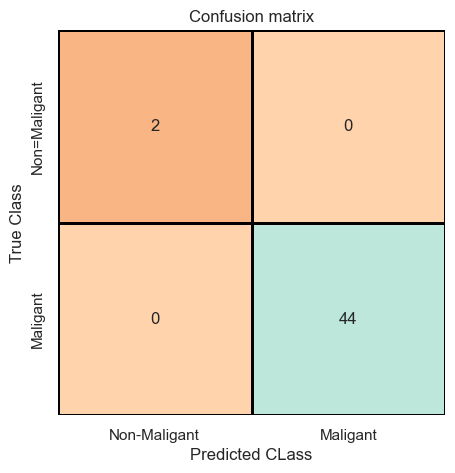

In [1656]:
#We are drawing cm on heatmap to have better understanding 
# sns.heatmap(cm,cmap = 'Red') ~ to check for available colors
sns.heatmap(cm,cmap = 'icefire_r', annot = True, fmt= 'd', cbar=False, linecolor='Black', linewidth = 2)
plt.title("Confusion matrix")
plt.xticks(np.arange(2)+.5,['Non-Maligant', 'Maligant'])
plt.yticks(np.arange(2)+.5,['Non=Maligant', 'Maligant'])
plt.xlabel('Predicted CLass')
plt.ylabel('True Class')

<AxesSubplot:>

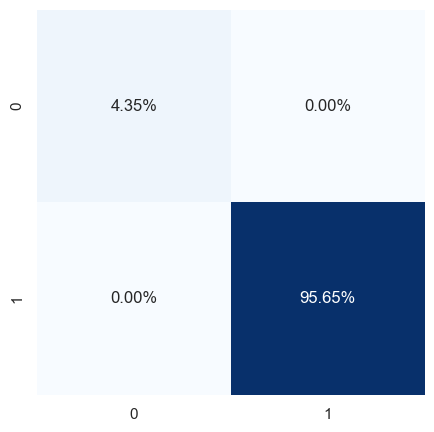

In [1657]:
sns.heatmap(cm/np.sum(cm), annot=True, 
            fmt='.2%', cmap='Blues', cbar = False)

### Evaluating all kinds of evaluating parameters. 

In [1658]:
# Evaluating the classifier
# printing every score of the classifier
# scoring in anything
from sklearn.metrics import classification_report 
from sklearn.metrics import f1_score, accuracy_score, precision_score,recall_score
from sklearn.metrics import confusion_matrix
  

print("The model used is Random Forest Classifier")
  
r_acc = accuracy_score(y_test, y_predicted)*100
print("\nThe accuracy is {}".format(r_acc))
  
prec = precision_score(y_test, y_predicted)
print("The precision is {}".format(prec))
  
rec = recall_score(y_test, y_predicted)
print("The recall is {}".format(rec))
  
f1 = f1_score(y_test, y_predicted)
print("The F1-Score is {}".format(f1))
 
c1 = classification_report(y_test, y_predicted)
print("Classification Report is:")
print()
print(c1)  

The model used is Random Forest Classifier

The accuracy is 100.0
The precision is 1.0
The recall is 1.0
The F1-Score is 1.0
Classification Report is:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00        44

    accuracy                           1.00        46
   macro avg       1.00      1.00      1.00        46
weighted avg       1.00      1.00      1.00        46



# Insight: -

In [1659]:
cal_metric=pd.DataFrame([l_acc,k_acc,r_acc],columns=["Score in percentage"])
cal_metric.index=['Logistic Regression',
                  'K-nearest Neighbours',
                  'Random Forest']
cal_metric

Score in percentage
Logistic Regression             95.652174
K-nearest Neighbours            95.652174
Random Forest                  100.000000


- As you can see with our Random Forest	(1.0000 or 100%)
- So we gonna save our model with Random Forest	 Algorithm

# Step 4: Save Model
**Goal:- In this step we are going to save our model in pickel format file.**

In [1660]:
import pickle
pickle.dump(clas , open('Startup_Success_Rate_Pred_lo.pkl', 'wb'))
pickle.dump(clas , open('Startup_Success_Rate_Pred_kn.pkl', 'wb'))
pickle.dump(clas , open('Startup_Success_Rate_Pred_ra.pkl', 'wb'))

In [1661]:
import pickle

def model_prediction(features):
    
    pickled_model = pickle.load(open('Startup_Success_Rate_Pred_ra.pkl', 'rb'))
    s = str(pickled_model.predict(features)[0])
    if s=='1':
        s='closed'
    else:
        s='acquired'
    
    return str(f'The startup will {s}')

#### We can test our model by giving our own parameters or features to predict. 

In [1663]:
state_code = 1
name = 47
labels = 0
founded_at = 6
closed_at = 18
category_code = 13
is_mobile = 1
is_gamesvideo = 0

In [1664]:
model_prediction([[state_code, name, labels, founded_at, closed_at, category_code, is_mobile,is_gamesvideo]])

'The startup will closed'

1 = closed, 0 = acquired

# Step 5: After making model and checking its accuracy, we are going to deploy it in API/ Web App. 

This step holds a great importance as in this step we make a Web API which integrates our model and let it interacts with user.
The user simply put data he is asked to fill and our API will help in predicting.

### There are many methods to create Web Application like Flask, Streamlit, etc. We going to use streamlit to create API. Below is an API refrence. 

https://tinyurl.com/bdexnk6v

# Conclusion

After observing the problem statement we have build an efficient model to solve the problem. The above model helps in predicting the success rate to startups. The accuracy for the prediction is 100%.